# Q4. Generative AI : GAN (20 pts)

## Tóm tắt vấn đề: Tạo sinh ảnh kí tự Kanji viết tay
Cho tập dữ liệu KMNIST từ Pytorch chứa các kí tự Kanji:
https://pytorch.org/vision/main/generated/torchvision.datasets.KMNIST.html
Yêu cầu :
1. Tận dụng kiến thức về các mô hình GAN đã học, học viên hãy phát triển 1 mô hình
GAN có thể tạo ra các ảnh tương tự như ảnh trong tập train của dataset KMNIST
2. Visualize và đánh giá kết quả thu được.

## 1. Tận dụng kiến thức về các mô hình GAN đã học, học viên hãy phát triển 1 mô hình GAN có thể tạo ra các ảnh tương tự như ảnh trong tập train của dataset KMNIST

### Import thư viện

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision.utils import save_image

In [2]:
# Config GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Download, xử lý bộ dữ liệu KMNIST

In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])])

In [4]:
train_dataset = datasets.KMNIST(root='./kmnist_data/', train=True, transform=transform, download=True)
test_dataset = datasets.KMNIST(root='./kmnist_data/', train=False, transform=transform, download=False)


  0%|          | 0/18165135 [00:00<?, ?it/s]


  0%|          | 65536/18165135 [00:00<00:46, 388813.47it/s]


  1%|          | 196608/18165135 [00:00<00:30, 596180.52it/s]


  3%|▎         | 524288/18165135 [00:00<00:15, 1164086.40it/s]


  5%|▌         | 950272/18165135 [00:00<00:10, 1646750.52it/s]


 10%|▉         | 1736704/18165135 [00:00<00:06, 2642120.55it/s]


 12%|█▏        | 2260992/18165135 [00:01<00:05, 2740167.01it/s]


 15%|█▌        | 2752512/18165135 [00:01<00:05, 2743654.25it/s]


 17%|█▋        | 3145728/18165135 [00:01<00:05, 2570291.96it/s]


 19%|█▉        | 3538944/18165135 [00:01<00:05, 2450025.76it/s]


 21%|██▏       | 3866624/18165135 [00:01<00:06, 2251274.64it/s]


 23%|██▎       | 4227072/18165135 [00:01<00:05, 2373704.61it/s]


 25%|██▍       | 4489216/18165135 [00:02<00:06, 2244900.69it/s]


 26%|██▌       | 4718592/18165135 [00:02<00:06, 1931454.61it/s]


 27%|██▋       | 4980736/18165135 [00:02<00:07, 1788249.74it/s]


 29%|██▉       | 5275648/18165135 [00:02<00:06, 1895316.42it/s]


 30%|███       | 5472256/18165135 [00:02<00:07, 1772196.76it/s]


 32%|███▏      | 5767168/18165135 [00:02<00:07, 1737721.69it/s]


 34%|███▎      | 6094848/18165135 [00:03<00:06, 1765140.08it/s]


 35%|███▌      | 6389760/18165135 [00:03<00:06, 1883306.12it/s]


 36%|███▋      | 6586368/18165135 [00:03<00:06, 1767311.98it/s]


 38%|███▊      | 6914048/18165135 [00:03<00:06, 1795130.94it/s]


 40%|███▉      | 7241728/18165135 [00:03<00:06, 1817004.16it/s]


 42%|████▏     | 7569408/18165135 [00:03<00:05, 1965030.57it/s]


 43%|████▎     | 7798784/18165135 [00:03<00:05, 1886610.36it/s]


 45%|████▍     | 8093696/18165135 [00:04<00:05, 1819011.04it/s]


 46%|████▋     | 8421376/18165135 [00:04<00:04, 1979367.85it/s]


 48%|████▊     | 8650752/18165135 [00:04<00:05, 1900736.17it/s]


 49%|████▉     | 8912896/18165135 [00:04<00:04, 1928241.00it/s]


 50%|█████     | 9109504/18165135 [00:04<00:05, 1800427.89it/s]


 52%|█████▏    | 9437184/18165135 [00:04<00:04, 1982455.33it/s]


 53%|█████▎    | 9666560/18165135 [00:04<00:04, 1894946.75it/s]


 55%|█████▍    | 9961472/18165135 [00:05<00:04, 1821526.50it/s]


 57%|█████▋    | 10289152/18165135 [00:05<00:03, 1987506.27it/s]


 58%|█████▊    | 10518528/18165135 [00:05<00:04, 1902855.45it/s]


 60%|█████▉    | 10813440/18165135 [00:05<00:04, 1827936.24it/s]


 61%|██████▏   | 11141120/18165135 [00:05<00:03, 1986457.31it/s]


 63%|██████▎   | 11370496/18165135 [00:05<00:03, 1904036.66it/s]


 64%|██████▍   | 11665408/18165135 [00:05<00:03, 1989811.76it/s]


 65%|██████▌   | 11894784/18165135 [00:06<00:03, 1903917.74it/s]


 67%|██████▋   | 12189696/18165135 [00:06<00:02, 1997241.14it/s]


 68%|██████▊   | 12419072/18165135 [00:06<00:03, 1914753.76it/s]


 70%|██████▉   | 12713984/18165135 [00:06<00:02, 2001465.33it/s]


 71%|███████▏  | 12943360/18165135 [00:06<00:02, 1916898.30it/s]


 73%|███████▎  | 13238272/18165135 [00:06<00:02, 1998324.67it/s]


 74%|███████▍  | 13467648/18165135 [00:06<00:02, 1923347.47it/s]


 76%|███████▌  | 13795328/18165135 [00:07<00:02, 2065876.22it/s]


 77%|███████▋  | 14024704/18165135 [00:07<00:02, 1966971.75it/s]


 79%|███████▉  | 14352384/18165135 [00:07<00:01, 2098158.01it/s]


 80%|████████  | 14581760/18165135 [00:07<00:01, 1989613.88it/s]


 82%|████████▏ | 14909440/18165135 [00:07<00:01, 2117458.78it/s]


 83%|████████▎ | 15138816/18165135 [00:07<00:01, 2011246.47it/s]


 85%|████████▌ | 15466496/18165135 [00:07<00:01, 2126322.87it/s]


 86%|████████▋ | 15695872/18165135 [00:07<00:01, 2021195.75it/s]


 88%|████████▊ | 16023552/18165135 [00:08<00:01, 2128044.47it/s]


 89%|████████▉ | 16252928/18165135 [00:08<00:00, 2022155.93it/s]


 91%|█████████▏| 16580608/18165135 [00:08<00:00, 2129357.27it/s]


 93%|█████████▎| 16842752/18165135 [00:08<00:00, 2094540.23it/s]


 95%|█████████▍| 17170432/18165135 [00:08<00:00, 2176820.00it/s]


 96%|█████████▌| 17399808/18165135 [00:08<00:00, 2060415.48it/s]


 98%|█████████▊| 17760256/18165135 [00:08<00:00, 2227947.06it/s]


 99%|█████████▉| 18022400/18165135 [00:09<00:00, 2159166.46it/s]


100%|██████████| 18165135/18165135 [00:09<00:00, 2003496.91it/s]

Extracting ./kmnist_data/KMNIST/raw/train-images-idx3-ubyte.gz to ./kmnist_data/KMNIST/raw



  0%|          | 0/29497 [00:00<?, ?it/s]


100%|██████████| 29497/29497 [00:00<00:00, 337659.31it/s]

Extracting ./kmnist_data/KMNIST/raw/train-labels-idx1-ubyte.gz to ./kmnist_data/KMNIST/raw




  0%|          | 0/3041136 [00:00<?, ?it/s]


  2%|▏         | 65536/3041136 [00:00<00:08, 371575.64it/s]


  5%|▌         | 163840/3041136 [00:00<00:06, 477986.53it/s]


 15%|█▌        | 458752/3041136 [00:00<00:02, 1016704.81it/s]


 25%|██▍       | 753664/3041136 [00:00<00:01, 1269165.22it/s]


 36%|███▌      | 1081344/3041136 [00:00<00:01, 1474798.74it/s]


 46%|████▋     | 1409024/3041136 [00:01<00:01, 1598592.07it/s]


 59%|█████▉    | 1802240/3041136 [00:01<00:00, 1792467.69it/s]


 70%|███████   | 2129920/3041136 [00:01<00:00, 1682432.82it/s]


 81%|████████  | 2457600/3041136 [00:01<00:00, 1858097.41it/s]


 91%|█████████ | 2752512/3041136 [00:01<00:00, 1790712.80it/s]


100%|██████████| 3041136/3041136 [00:01<00:00, 1740998.02it/s]


100%|██████████| 3041136/3041136 [00:01<00:00, 1550748.28it/s]

Extracting ./kmnist_data/KMNIST/raw/t10k-images-idx3-ubyte.gz to ./kmnist_data/KMNIST/raw




  0%|          | 0/5120 [00:00<?, ?it/s]


100%|██████████| 5120/5120 [00:00<00:00, 9057290.80it/s]

Extracting ./kmnist_data/KMNIST/raw/t10k-labels-idx1-ubyte.gz to ./kmnist_data/KMNIST/raw



In [5]:
batch_size = 2000

In [6]:
# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

### Visualize samples thực từ dataset

In [7]:
img, label = train_dataset[0]
print('Label: ', label)
print(img[:,10:15,10:15])

Label:  8
tensor([[[-1.0000, -0.8745,  0.6235,  0.9765, -0.3412],
         [-1.0000,  0.0431,  1.0000,  0.1608, -1.0000],
         [-0.1765,  0.9765,  0.7255, -0.8667, -1.0000],
         [ 0.9294,  0.9922, -0.3804, -1.0000, -1.0000],
         [ 1.0000,  0.4588, -0.9843, -1.0000, -1.0000]]])


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

def denorm(x):
    out = (x + 1) / 2
    return out.clamp(0, 1)


Label: 8


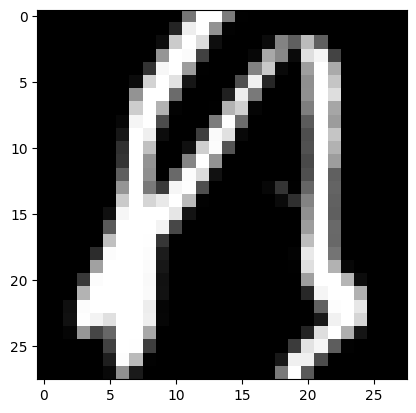

In [9]:
img_norm = denorm(img)
plt.imshow(img_norm[0], cmap='gray')
print('Label:', label)

### Xây dựng mô hình Generator

In [10]:
class Generator(nn.Module):
    def __init__(self, latent_dim, channels):
        super(Generator, self).__init__()

        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128 * 7 * 7),
            nn.BatchNorm1d(128 * 7 * 7),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Unflatten(1, (128, 7, 7)),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Upsample(scale_factor=2, mode='nearest'),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64, momentum=0.8),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, channels, kernel_size=3, padding=1),
            nn.Tanh()
        )

    def forward(self, noise):
        img = self.model(noise)
        return img

### Xây dựng mô hình Discriminator

In [11]:
class Discriminator(nn.Module):
    def __init__(self, channels):
        super(Discriminator, self).__init__()

        self.model = nn.Sequential(
            nn.Conv2d(channels, 32, kernel_size=3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.ZeroPad2d((0, 1, 0, 1)),
            nn.BatchNorm2d(64, momentum=0.8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128, momentum=0.8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256, momentum=0.8),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.25),
            nn.Flatten(),
            nn.Linear(256 * 4 * 4, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        validity = self.model(img)
        return validity

In [12]:
# Khởi tạo input z (random noise) có chiều là 100
z_dim = 100

In [13]:
# Tính chiều của mỗi ảnh trong tập KMNIST 28x28=784
kmnist_dim = train_dataset.data.size(1) * train_dataset.data.size(2)
kmnist_dim

784

In [14]:
latent_dim = z_dim  # or your desired latent dimension
channels = 1  # or the number of channels in your KMNIST images
G = Generator(latent_dim, channels).to(device)
D = Discriminator(channels).to(device)

In [15]:
print(G)
print(D)

Generator(
  (model): Sequential(
    (0): Linear(in_features=100, out_features=6272, bias=True)
    (1): BatchNorm1d(6272, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.2, inplace=True)
    (3): Unflatten(dim=1, unflattened_size=(128, 7, 7))
    (4): Upsample(scale_factor=2.0, mode='nearest')
    (5): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Upsample(scale_factor=2.0, mode='nearest')
    (9): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.8, affine=True, track_running_stats=True)
    (11): LeakyReLU(negative_slope=0.2, inplace=True)
    (12): Conv2d(64, 1, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): Tanh()
  )
)
Discriminator(
  (model): Sequential(
    (0): Conv2d(1, 32, 

### Loss function và tham số cho quá trình training

In [16]:
lr = 0.0002
beta1 = 0.5
beta2 = 0.999
criterion = nn.BCELoss()
G_optimizer = optim.Adam(G.parameters(), lr=lr, betas=(beta1, beta2))
D_optimizer = optim.Adam(D.parameters(), lr=lr, betas=(beta1, beta2))

In [17]:
def discriminator_train(x):

    D.zero_grad()

    # train discriminator on real data
    x_real, y_real = x.view(-1, 1, 28, 28), torch.ones(batch_size, 1)
    x_real, y_real = Variable(x_real.to(device)), Variable(y_real.to(device))

    D_output = D(x_real)
    D_real_loss = criterion(D_output, y_real)
    D_real_score = D_output

    # train discriminator on fake data
    z = Variable(torch.randn(batch_size, z_dim).to(device))
    x_fake, y_fake = G(z), Variable(torch.zeros(batch_size, 1).to(device))

    D_output = D(x_fake)
    D_fake_loss = criterion(D_output, y_fake)
    D_fake_score = D_output

    # gradient backprop & optimize ONLY D's parameters
    D_loss = D_real_loss + D_fake_loss
    D_loss.backward()
    D_optimizer.step()

    # calculate accuracy
    D_real_accuracy = torch.divide(torch.sum(D_real_score > 0.5).float(), x_real.size(0))
    D_fake_accuracy = torch.divide(torch.sum(D_fake_score < 0.5).float(), x_real.size(0))

    return D_loss.data.item(), D_real_accuracy.item(), D_fake_accuracy.item()

In [18]:
def generator_train(x):
    G.zero_grad()

    z = Variable(torch.randn(batch_size, z_dim).to(device))
    y = Variable(torch.ones(batch_size, 1).to(device))

    G_output = G(z)
    D_output = D(G_output)
    G_loss = criterion(D_output, y)

    # gradient backprop & optimize ONLY G's parameters
    G_loss.backward()
    G_optimizer.step()

    return G_loss.data.item()

### Training

In [19]:
n_epoch = 100
epoch_D_losses, epoch_G_losses, epoch_D_real_accuracies, epoch_D_fake_accuracies = [], [], [], []
for epoch in range(1, n_epoch+1):
    D_losses, G_losses, D_real_accuracies, D_fake_accuracies = [], [], [], []
    for batch_idx, (x, _) in enumerate(train_loader):
        # Discriminator training trước, Generator training sau
        D_loss, D_real_accuracy, D_fake_accuracy = discriminator_train(x)
        G_loss = generator_train(x)

        D_losses.append(D_loss)
        G_losses.append(G_loss)
        D_real_accuracies.append(D_real_accuracy)
        D_fake_accuracies.append(D_fake_accuracy)
    epoch_D_losses.append(torch.mean(torch.FloatTensor(D_losses)))
    epoch_G_losses.append(torch.mean(torch.FloatTensor(G_losses)))
    epoch_D_real_accuracies.append(torch.mean(torch.FloatTensor(D_real_accuracies)))
    epoch_D_fake_accuracies.append(torch.mean(torch.FloatTensor(D_fake_accuracies)))

    print('[%d/%d]: Discriminator loss: %.3f, Generator loss: %.3f, Real accuracy: %.3f, Fake accuracy: %.3f' % (
    epoch, n_epoch, epoch_D_losses[-1], epoch_G_losses[-1], epoch_D_real_accuracies[-1], epoch_D_fake_accuracies[-1]))
    
    
    if (epoch + 1) % 10 == 0:

        # Save the checkpoint
        checkpoint = {
            'epoch': epoch,
            'model_state_dict_G': G.state_dict(),
            'model_state_dict_D': D.state_dict(),
            'optimizer_state_dict_G': G_optimizer.state_dict(),
            'optimizer_state_dict_D': D_optimizer.state_dict(),
            'epoch_D_losses': epoch_D_losses,
            'epoch_G_losses': epoch_G_losses,
            'epoch_D_real_accuracies': epoch_D_real_accuracies,
            'epoch_D_fake_accuracies': epoch_D_fake_accuracies,
        }

        torch.save(checkpoint, 'checkpoint.pth')
        print("Checkpoint saved!")


[1/100]: Discriminator loss: 0.972, Generator loss: 1.429, Real accuracy: 0.790, Fake accuracy: 0.798


[2/100]: Discriminator loss: 1.115, Generator loss: 1.342, Real accuracy: 0.706, Fake accuracy: 0.711


[3/100]: Discriminator loss: 1.211, Generator loss: 1.075, Real accuracy: 0.670, Fake accuracy: 0.666


[4/100]: Discriminator loss: 1.275, Generator loss: 0.956, Real accuracy: 0.630, Fake accuracy: 0.644


[5/100]: Discriminator loss: 1.311, Generator loss: 0.901, Real accuracy: 0.608, Fake accuracy: 0.617


[6/100]: Discriminator loss: 1.312, Generator loss: 0.865, Real accuracy: 0.611, Fake accuracy: 0.610


[7/100]: Discriminator loss: 1.279, Generator loss: 0.867, Real accuracy: 0.627, Fake accuracy: 0.638


[8/100]: Discriminator loss: 1.272, Generator loss: 0.889, Real accuracy: 0.631, Fake accuracy: 0.642


[9/100]: Discriminator loss: 1.271, Generator loss: 0.906, Real accuracy: 0.639, Fake accuracy: 0.638
Checkpoint saved!


[10/100]: Discriminator loss: 1.284, Generator loss: 0.936, Real accuracy: 0.631, Fake accuracy: 0.632


[11/100]: Discriminator loss: 1.273, Generator loss: 0.940, Real accuracy: 0.631, Fake accuracy: 0.645


[12/100]: Discriminator loss: 1.236, Generator loss: 0.920, Real accuracy: 0.649, Fake accuracy: 0.670


[13/100]: Discriminator loss: 1.252, Generator loss: 0.947, Real accuracy: 0.648, Fake accuracy: 0.647


[14/100]: Discriminator loss: 1.221, Generator loss: 0.942, Real accuracy: 0.657, Fake accuracy: 0.678


[15/100]: Discriminator loss: 1.211, Generator loss: 0.968, Real accuracy: 0.669, Fake accuracy: 0.682


[16/100]: Discriminator loss: 1.194, Generator loss: 0.984, Real accuracy: 0.678, Fake accuracy: 0.694


[17/100]: Discriminator loss: 1.183, Generator loss: 0.975, Real accuracy: 0.674, Fake accuracy: 0.706


[18/100]: Discriminator loss: 1.220, Generator loss: 0.988, Real accuracy: 0.658, Fake accuracy: 0.668


[19/100]: Discriminator loss: 1.216, Generator loss: 0.974, Real accuracy: 0.655, Fake accuracy: 0.679
Checkpoint saved!


[20/100]: Discriminator loss: 1.215, Generator loss: 0.955, Real accuracy: 0.665, Fake accuracy: 0.680


[21/100]: Discriminator loss: 1.232, Generator loss: 0.929, Real accuracy: 0.648, Fake accuracy: 0.672


[22/100]: Discriminator loss: 1.206, Generator loss: 0.933, Real accuracy: 0.670, Fake accuracy: 0.690


[23/100]: Discriminator loss: 1.214, Generator loss: 0.927, Real accuracy: 0.665, Fake accuracy: 0.682


[24/100]: Discriminator loss: 1.245, Generator loss: 0.896, Real accuracy: 0.642, Fake accuracy: 0.664


[25/100]: Discriminator loss: 1.237, Generator loss: 0.882, Real accuracy: 0.652, Fake accuracy: 0.669


[26/100]: Discriminator loss: 1.253, Generator loss: 0.884, Real accuracy: 0.643, Fake accuracy: 0.656


[27/100]: Discriminator loss: 1.238, Generator loss: 0.881, Real accuracy: 0.646, Fake accuracy: 0.674


[28/100]: Discriminator loss: 1.222, Generator loss: 0.888, Real accuracy: 0.668, Fake accuracy: 0.679


[29/100]: Discriminator loss: 1.248, Generator loss: 0.902, Real accuracy: 0.647, Fake accuracy: 0.654
Checkpoint saved!


[30/100]: Discriminator loss: 1.239, Generator loss: 0.901, Real accuracy: 0.653, Fake accuracy: 0.665


[31/100]: Discriminator loss: 1.232, Generator loss: 0.907, Real accuracy: 0.659, Fake accuracy: 0.670


[32/100]: Discriminator loss: 1.240, Generator loss: 0.917, Real accuracy: 0.651, Fake accuracy: 0.666


[33/100]: Discriminator loss: 1.226, Generator loss: 0.907, Real accuracy: 0.660, Fake accuracy: 0.672


[34/100]: Discriminator loss: 1.221, Generator loss: 0.913, Real accuracy: 0.661, Fake accuracy: 0.681


[35/100]: Discriminator loss: 1.228, Generator loss: 0.912, Real accuracy: 0.656, Fake accuracy: 0.667


[36/100]: Discriminator loss: 1.214, Generator loss: 0.917, Real accuracy: 0.669, Fake accuracy: 0.679


[37/100]: Discriminator loss: 1.219, Generator loss: 0.913, Real accuracy: 0.657, Fake accuracy: 0.673


[38/100]: Discriminator loss: 1.205, Generator loss: 0.913, Real accuracy: 0.666, Fake accuracy: 0.691


[39/100]: Discriminator loss: 1.203, Generator loss: 0.920, Real accuracy: 0.676, Fake accuracy: 0.685
Checkpoint saved!


[40/100]: Discriminator loss: 1.194, Generator loss: 0.929, Real accuracy: 0.680, Fake accuracy: 0.691


[41/100]: Discriminator loss: 1.188, Generator loss: 0.931, Real accuracy: 0.671, Fake accuracy: 0.700


[42/100]: Discriminator loss: 1.188, Generator loss: 0.954, Real accuracy: 0.674, Fake accuracy: 0.692


[43/100]: Discriminator loss: 1.182, Generator loss: 0.951, Real accuracy: 0.684, Fake accuracy: 0.695


[44/100]: Discriminator loss: 1.180, Generator loss: 0.963, Real accuracy: 0.687, Fake accuracy: 0.691


[45/100]: Discriminator loss: 1.169, Generator loss: 0.963, Real accuracy: 0.681, Fake accuracy: 0.709


[46/100]: Discriminator loss: 1.169, Generator loss: 0.974, Real accuracy: 0.686, Fake accuracy: 0.703


[47/100]: Discriminator loss: 1.153, Generator loss: 0.984, Real accuracy: 0.699, Fake accuracy: 0.710


[48/100]: Discriminator loss: 1.158, Generator loss: 0.998, Real accuracy: 0.698, Fake accuracy: 0.705


[49/100]: Discriminator loss: 1.168, Generator loss: 0.987, Real accuracy: 0.685, Fake accuracy: 0.702
Checkpoint saved!


[50/100]: Discriminator loss: 1.145, Generator loss: 0.991, Real accuracy: 0.697, Fake accuracy: 0.717


[51/100]: Discriminator loss: 1.150, Generator loss: 1.011, Real accuracy: 0.693, Fake accuracy: 0.711


[52/100]: Discriminator loss: 1.129, Generator loss: 1.006, Real accuracy: 0.707, Fake accuracy: 0.729


[53/100]: Discriminator loss: 1.141, Generator loss: 1.023, Real accuracy: 0.703, Fake accuracy: 0.712


[54/100]: Discriminator loss: 1.128, Generator loss: 1.019, Real accuracy: 0.704, Fake accuracy: 0.724


[55/100]: Discriminator loss: 1.128, Generator loss: 1.032, Real accuracy: 0.709, Fake accuracy: 0.721


[56/100]: Discriminator loss: 1.132, Generator loss: 1.036, Real accuracy: 0.698, Fake accuracy: 0.722


[57/100]: Discriminator loss: 1.115, Generator loss: 1.030, Real accuracy: 0.709, Fake accuracy: 0.729


[58/100]: Discriminator loss: 1.119, Generator loss: 1.049, Real accuracy: 0.711, Fake accuracy: 0.722


[59/100]: Discriminator loss: 1.109, Generator loss: 1.053, Real accuracy: 0.710, Fake accuracy: 0.736
Checkpoint saved!


[60/100]: Discriminator loss: 1.110, Generator loss: 1.062, Real accuracy: 0.714, Fake accuracy: 0.729


[61/100]: Discriminator loss: 1.125, Generator loss: 1.065, Real accuracy: 0.707, Fake accuracy: 0.716


[62/100]: Discriminator loss: 1.092, Generator loss: 1.053, Real accuracy: 0.718, Fake accuracy: 0.746


[63/100]: Discriminator loss: 1.112, Generator loss: 1.076, Real accuracy: 0.710, Fake accuracy: 0.724


[64/100]: Discriminator loss: 1.098, Generator loss: 1.077, Real accuracy: 0.727, Fake accuracy: 0.729


[65/100]: Discriminator loss: 1.105, Generator loss: 1.075, Real accuracy: 0.708, Fake accuracy: 0.736


[66/100]: Discriminator loss: 1.113, Generator loss: 1.101, Real accuracy: 0.713, Fake accuracy: 0.717


[67/100]: Discriminator loss: 1.071, Generator loss: 1.075, Real accuracy: 0.729, Fake accuracy: 0.760


[68/100]: Discriminator loss: 1.111, Generator loss: 1.100, Real accuracy: 0.709, Fake accuracy: 0.721


[69/100]: Discriminator loss: 1.102, Generator loss: 1.103, Real accuracy: 0.720, Fake accuracy: 0.723
Checkpoint saved!


[70/100]: Discriminator loss: 1.093, Generator loss: 1.092, Real accuracy: 0.711, Fake accuracy: 0.738


[71/100]: Discriminator loss: 1.092, Generator loss: 1.110, Real accuracy: 0.718, Fake accuracy: 0.735


[72/100]: Discriminator loss: 1.090, Generator loss: 1.103, Real accuracy: 0.723, Fake accuracy: 0.732


[73/100]: Discriminator loss: 1.060, Generator loss: 1.115, Real accuracy: 0.737, Fake accuracy: 0.753


[74/100]: Discriminator loss: 1.102, Generator loss: 1.119, Real accuracy: 0.707, Fake accuracy: 0.727


[75/100]: Discriminator loss: 1.082, Generator loss: 1.129, Real accuracy: 0.727, Fake accuracy: 0.735


[76/100]: Discriminator loss: 1.073, Generator loss: 1.132, Real accuracy: 0.728, Fake accuracy: 0.742


[77/100]: Discriminator loss: 1.072, Generator loss: 1.110, Real accuracy: 0.720, Fake accuracy: 0.749


[78/100]: Discriminator loss: 1.081, Generator loss: 1.136, Real accuracy: 0.720, Fake accuracy: 0.740


[79/100]: Discriminator loss: 1.080, Generator loss: 1.148, Real accuracy: 0.732, Fake accuracy: 0.732
Checkpoint saved!


[80/100]: Discriminator loss: 1.056, Generator loss: 1.125, Real accuracy: 0.733, Fake accuracy: 0.755


[81/100]: Discriminator loss: 1.072, Generator loss: 1.150, Real accuracy: 0.727, Fake accuracy: 0.736


[82/100]: Discriminator loss: 1.080, Generator loss: 1.142, Real accuracy: 0.721, Fake accuracy: 0.740


[83/100]: Discriminator loss: 1.058, Generator loss: 1.150, Real accuracy: 0.730, Fake accuracy: 0.748


[84/100]: Discriminator loss: 1.038, Generator loss: 1.162, Real accuracy: 0.752, Fake accuracy: 0.758


[85/100]: Discriminator loss: 1.056, Generator loss: 1.176, Real accuracy: 0.733, Fake accuracy: 0.746


[86/100]: Discriminator loss: 1.067, Generator loss: 1.168, Real accuracy: 0.724, Fake accuracy: 0.739


[87/100]: Discriminator loss: 1.070, Generator loss: 1.160, Real accuracy: 0.721, Fake accuracy: 0.741


[88/100]: Discriminator loss: 1.045, Generator loss: 1.182, Real accuracy: 0.738, Fake accuracy: 0.755


[89/100]: Discriminator loss: 1.062, Generator loss: 1.207, Real accuracy: 0.732, Fake accuracy: 0.740
Checkpoint saved!


[90/100]: Discriminator loss: 1.032, Generator loss: 1.180, Real accuracy: 0.746, Fake accuracy: 0.760


[91/100]: Discriminator loss: 1.066, Generator loss: 1.177, Real accuracy: 0.723, Fake accuracy: 0.745


[92/100]: Discriminator loss: 1.053, Generator loss: 1.191, Real accuracy: 0.734, Fake accuracy: 0.748


[93/100]: Discriminator loss: 1.039, Generator loss: 1.213, Real accuracy: 0.745, Fake accuracy: 0.752


[94/100]: Discriminator loss: 1.032, Generator loss: 1.188, Real accuracy: 0.738, Fake accuracy: 0.762


[95/100]: Discriminator loss: 1.051, Generator loss: 1.217, Real accuracy: 0.734, Fake accuracy: 0.744


[96/100]: Discriminator loss: 1.025, Generator loss: 1.211, Real accuracy: 0.750, Fake accuracy: 0.755


[97/100]: Discriminator loss: 1.035, Generator loss: 1.197, Real accuracy: 0.732, Fake accuracy: 0.762


[98/100]: Discriminator loss: 1.046, Generator loss: 1.224, Real accuracy: 0.737, Fake accuracy: 0.743


[99/100]: Discriminator loss: 1.038, Generator loss: 1.220, Real accuracy: 0.742, Fake accuracy: 0.748
Checkpoint saved!


[100/100]: Discriminator loss: 1.039, Generator loss: 1.215, Real accuracy: 0.735, Fake accuracy: 0.753


In [20]:
# Save the model checkpoints
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

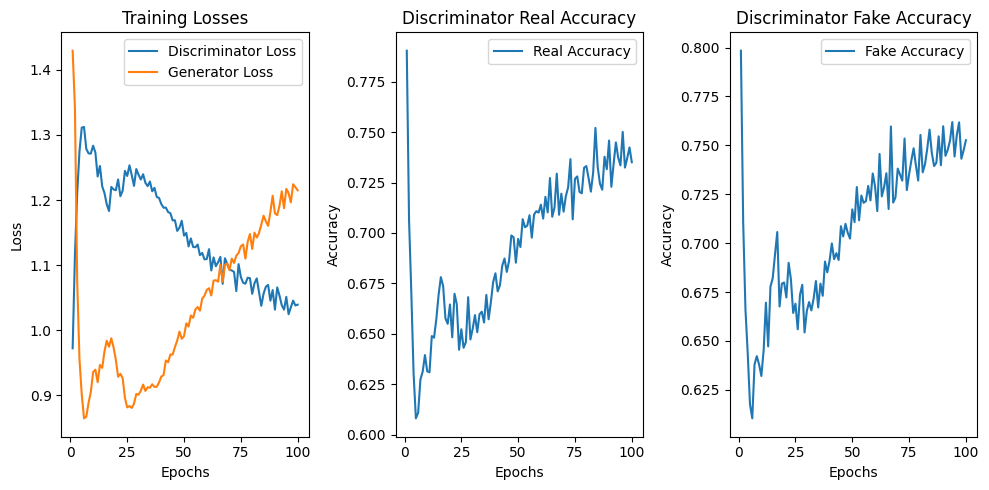

In [21]:
# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 100+1), epoch_D_losses, label='Discriminator Loss')
plt.plot(range(1, 100+1), epoch_G_losses, label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Discriminator Real Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, 100+1), epoch_D_real_accuracies, label='Real Accuracy')
plt.title('Discriminator Real Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Discriminator Fake Accuracy
plt.subplot(1, 3, 3)
plt.plot(range(1, 100+1), epoch_D_fake_accuracies, label='Fake Accuracy')
plt.title('Discriminator Fake Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

#### Nhận xét train mô hình Generative Adversarial Network (GAN) qua 100 epochs:

Discriminator Loss và Generator Loss:

- Discriminator loss giảm dần theo thời gian, điều này làm tăng khả năng mô hình đánh lừa mô hình phân biệt giả mạo.
- Generator loss giảm dần => generator đang học cách sinh ra mẫu dữ liệu giả mạo tốt hơn.

Real và Fake Accuracy:

- Real accuracy giảm dần => discriminator khó khăn hơn khi phân biệt giữa dữ liệu thực và dữ liệu giả mạo.
- Fake accuracy tăng dần => thấy generator tạo ra các mẫu giả mạo mà discriminator khó phân biệt với mẫu thực.

=> Giảm discriminator loss và tăng generator loss, suy đoán là có sự cải thiện trong chất lượng mẫu được sinh ra

In [22]:
with torch.no_grad():
    test_z = Variable(torch.randn(100, z_dim).to(device))
    generated = G(test_z)

    save_image(generated.view(generated.size(0), 1, 28, 28), './sample_100' + '.png')

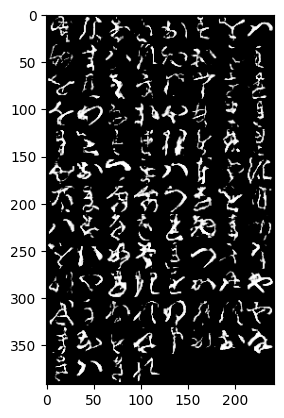

In [23]:
#Visualize kết quả từ mạng Generator sau quá trình training (sau 100 epoch)
plt.imshow(plt.imread('./sample_100.png'))

#### Nhận xét: 
- Chữ viết được tạo giả đã có vài hình khá thật, còn lại phần lớn vẫn chưa được tốt

=> Mô hình có vẻ có thể sử dụng, tiếp tục train

In [24]:
n_epoch = 100
for epoch in range(101, n_epoch+101):
    D_losses, G_losses, D_real_accuracies, D_fake_accuracies = [], [], [], []
    for batch_idx, (x, _) in enumerate(train_loader):
        # Discriminator training trước, Generator training sau
        D_loss, D_real_accuracy, D_fake_accuracy = discriminator_train(x)
        G_loss = generator_train(x)

        D_losses.append(D_loss)
        G_losses.append(G_loss)
        D_real_accuracies.append(D_real_accuracy)
        D_fake_accuracies.append(D_fake_accuracy)
    epoch_D_losses.append(torch.mean(torch.FloatTensor(D_losses)))
    epoch_G_losses.append(torch.mean(torch.FloatTensor(G_losses)))
    epoch_D_real_accuracies.append(torch.mean(torch.FloatTensor(D_real_accuracies)))
    epoch_D_fake_accuracies.append(torch.mean(torch.FloatTensor(D_fake_accuracies)))

    print('[%d/%d]: Discriminator loss: %.3f, Generator loss: %.3f, Real accuracy: %.3f, Fake accuracy: %.3f' % (
    epoch, 100+n_epoch, epoch_D_losses[-1], epoch_G_losses[-1], epoch_D_real_accuracies[-1], epoch_D_fake_accuracies[-1]))


[101/200]: Discriminator loss: 1.007, Generator loss: 1.223, Real accuracy: 0.760, Fake accuracy: 0.768


[102/200]: Discriminator loss: 1.044, Generator loss: 1.207, Real accuracy: 0.728, Fake accuracy: 0.752


[103/200]: Discriminator loss: 1.022, Generator loss: 1.238, Real accuracy: 0.749, Fake accuracy: 0.754


[104/200]: Discriminator loss: 1.036, Generator loss: 1.222, Real accuracy: 0.738, Fake accuracy: 0.749


[105/200]: Discriminator loss: 1.016, Generator loss: 1.239, Real accuracy: 0.751, Fake accuracy: 0.761


[106/200]: Discriminator loss: 1.031, Generator loss: 1.240, Real accuracy: 0.737, Fake accuracy: 0.760


[107/200]: Discriminator loss: 0.999, Generator loss: 1.229, Real accuracy: 0.757, Fake accuracy: 0.777


[108/200]: Discriminator loss: 1.023, Generator loss: 1.248, Real accuracy: 0.748, Fake accuracy: 0.753


[109/200]: Discriminator loss: 1.012, Generator loss: 1.237, Real accuracy: 0.748, Fake accuracy: 0.764


[110/200]: Discriminator loss: 1.014, Generator loss: 1.260, Real accuracy: 0.750, Fake accuracy: 0.756


[111/200]: Discriminator loss: 0.997, Generator loss: 1.246, Real accuracy: 0.753, Fake accuracy: 0.771


[112/200]: Discriminator loss: 1.006, Generator loss: 1.270, Real accuracy: 0.750, Fake accuracy: 0.768


[113/200]: Discriminator loss: 1.014, Generator loss: 1.274, Real accuracy: 0.752, Fake accuracy: 0.757


[114/200]: Discriminator loss: 1.027, Generator loss: 1.271, Real accuracy: 0.738, Fake accuracy: 0.755


[115/200]: Discriminator loss: 0.987, Generator loss: 1.283, Real accuracy: 0.764, Fake accuracy: 0.769


[116/200]: Discriminator loss: 0.995, Generator loss: 1.259, Real accuracy: 0.751, Fake accuracy: 0.771


[117/200]: Discriminator loss: 1.001, Generator loss: 1.294, Real accuracy: 0.754, Fake accuracy: 0.764


[118/200]: Discriminator loss: 0.999, Generator loss: 1.284, Real accuracy: 0.752, Fake accuracy: 0.768


[119/200]: Discriminator loss: 1.000, Generator loss: 1.295, Real accuracy: 0.751, Fake accuracy: 0.763


[120/200]: Discriminator loss: 1.002, Generator loss: 1.306, Real accuracy: 0.750, Fake accuracy: 0.761


[121/200]: Discriminator loss: 1.004, Generator loss: 1.299, Real accuracy: 0.750, Fake accuracy: 0.760


[122/200]: Discriminator loss: 0.993, Generator loss: 1.301, Real accuracy: 0.754, Fake accuracy: 0.770


[123/200]: Discriminator loss: 0.975, Generator loss: 1.302, Real accuracy: 0.766, Fake accuracy: 0.777


[124/200]: Discriminator loss: 1.009, Generator loss: 1.309, Real accuracy: 0.744, Fake accuracy: 0.762


[125/200]: Discriminator loss: 0.976, Generator loss: 1.358, Real accuracy: 0.764, Fake accuracy: 0.772


[126/200]: Discriminator loss: 0.959, Generator loss: 1.324, Real accuracy: 0.767, Fake accuracy: 0.786


[127/200]: Discriminator loss: 1.006, Generator loss: 1.318, Real accuracy: 0.756, Fake accuracy: 0.754


[128/200]: Discriminator loss: 0.962, Generator loss: 1.301, Real accuracy: 0.764, Fake accuracy: 0.788


[129/200]: Discriminator loss: 1.005, Generator loss: 1.342, Real accuracy: 0.748, Fake accuracy: 0.760


[130/200]: Discriminator loss: 0.966, Generator loss: 1.350, Real accuracy: 0.763, Fake accuracy: 0.776


[131/200]: Discriminator loss: 0.981, Generator loss: 1.327, Real accuracy: 0.759, Fake accuracy: 0.771


[132/200]: Discriminator loss: 0.986, Generator loss: 1.330, Real accuracy: 0.754, Fake accuracy: 0.766


[133/200]: Discriminator loss: 0.970, Generator loss: 1.334, Real accuracy: 0.773, Fake accuracy: 0.774


[134/200]: Discriminator loss: 0.989, Generator loss: 1.351, Real accuracy: 0.754, Fake accuracy: 0.773


[135/200]: Discriminator loss: 0.952, Generator loss: 1.336, Real accuracy: 0.774, Fake accuracy: 0.782


[136/200]: Discriminator loss: 0.961, Generator loss: 1.334, Real accuracy: 0.769, Fake accuracy: 0.778


[137/200]: Discriminator loss: 0.985, Generator loss: 1.370, Real accuracy: 0.760, Fake accuracy: 0.769


[138/200]: Discriminator loss: 0.962, Generator loss: 1.351, Real accuracy: 0.769, Fake accuracy: 0.779


[139/200]: Discriminator loss: 0.971, Generator loss: 1.344, Real accuracy: 0.762, Fake accuracy: 0.777


[140/200]: Discriminator loss: 0.990, Generator loss: 1.346, Real accuracy: 0.754, Fake accuracy: 0.765


[141/200]: Discriminator loss: 0.970, Generator loss: 1.380, Real accuracy: 0.769, Fake accuracy: 0.767


[142/200]: Discriminator loss: 0.973, Generator loss: 1.352, Real accuracy: 0.758, Fake accuracy: 0.776


[143/200]: Discriminator loss: 0.967, Generator loss: 1.377, Real accuracy: 0.760, Fake accuracy: 0.779


[144/200]: Discriminator loss: 0.949, Generator loss: 1.369, Real accuracy: 0.777, Fake accuracy: 0.781


[145/200]: Discriminator loss: 0.951, Generator loss: 1.370, Real accuracy: 0.772, Fake accuracy: 0.781


[146/200]: Discriminator loss: 0.964, Generator loss: 1.403, Real accuracy: 0.764, Fake accuracy: 0.771


[147/200]: Discriminator loss: 0.957, Generator loss: 1.380, Real accuracy: 0.765, Fake accuracy: 0.781


[148/200]: Discriminator loss: 0.951, Generator loss: 1.377, Real accuracy: 0.766, Fake accuracy: 0.787


[149/200]: Discriminator loss: 0.958, Generator loss: 1.399, Real accuracy: 0.767, Fake accuracy: 0.776


[150/200]: Discriminator loss: 0.931, Generator loss: 1.427, Real accuracy: 0.788, Fake accuracy: 0.784


[151/200]: Discriminator loss: 0.969, Generator loss: 1.369, Real accuracy: 0.755, Fake accuracy: 0.779


[152/200]: Discriminator loss: 0.908, Generator loss: 1.380, Real accuracy: 0.789, Fake accuracy: 0.805


[153/200]: Discriminator loss: 0.980, Generator loss: 1.450, Real accuracy: 0.763, Fake accuracy: 0.759


[154/200]: Discriminator loss: 0.934, Generator loss: 1.395, Real accuracy: 0.778, Fake accuracy: 0.789


[155/200]: Discriminator loss: 0.975, Generator loss: 1.422, Real accuracy: 0.756, Fake accuracy: 0.766


[156/200]: Discriminator loss: 0.930, Generator loss: 1.388, Real accuracy: 0.779, Fake accuracy: 0.792


[157/200]: Discriminator loss: 0.948, Generator loss: 1.401, Real accuracy: 0.766, Fake accuracy: 0.782


[158/200]: Discriminator loss: 0.954, Generator loss: 1.417, Real accuracy: 0.767, Fake accuracy: 0.776


[159/200]: Discriminator loss: 0.944, Generator loss: 1.436, Real accuracy: 0.776, Fake accuracy: 0.777


[160/200]: Discriminator loss: 0.947, Generator loss: 1.418, Real accuracy: 0.769, Fake accuracy: 0.784


[161/200]: Discriminator loss: 0.944, Generator loss: 1.408, Real accuracy: 0.772, Fake accuracy: 0.783


[162/200]: Discriminator loss: 0.916, Generator loss: 1.433, Real accuracy: 0.783, Fake accuracy: 0.793


[163/200]: Discriminator loss: 0.936, Generator loss: 1.421, Real accuracy: 0.773, Fake accuracy: 0.786


[164/200]: Discriminator loss: 0.960, Generator loss: 1.437, Real accuracy: 0.767, Fake accuracy: 0.771


[165/200]: Discriminator loss: 0.909, Generator loss: 1.405, Real accuracy: 0.781, Fake accuracy: 0.800


[166/200]: Discriminator loss: 0.935, Generator loss: 1.441, Real accuracy: 0.776, Fake accuracy: 0.781


[167/200]: Discriminator loss: 0.948, Generator loss: 1.430, Real accuracy: 0.768, Fake accuracy: 0.780


[168/200]: Discriminator loss: 0.935, Generator loss: 1.471, Real accuracy: 0.777, Fake accuracy: 0.780


[169/200]: Discriminator loss: 0.922, Generator loss: 1.424, Real accuracy: 0.776, Fake accuracy: 0.795


[170/200]: Discriminator loss: 0.951, Generator loss: 1.448, Real accuracy: 0.767, Fake accuracy: 0.778


[171/200]: Discriminator loss: 0.928, Generator loss: 1.441, Real accuracy: 0.780, Fake accuracy: 0.786


[172/200]: Discriminator loss: 0.918, Generator loss: 1.446, Real accuracy: 0.782, Fake accuracy: 0.788


[173/200]: Discriminator loss: 0.921, Generator loss: 1.467, Real accuracy: 0.781, Fake accuracy: 0.789


[174/200]: Discriminator loss: 0.915, Generator loss: 1.478, Real accuracy: 0.786, Fake accuracy: 0.794


[175/200]: Discriminator loss: 0.930, Generator loss: 1.433, Real accuracy: 0.773, Fake accuracy: 0.791


[176/200]: Discriminator loss: 0.933, Generator loss: 1.471, Real accuracy: 0.770, Fake accuracy: 0.789


[177/200]: Discriminator loss: 0.900, Generator loss: 1.467, Real accuracy: 0.791, Fake accuracy: 0.796


[178/200]: Discriminator loss: 0.957, Generator loss: 1.459, Real accuracy: 0.767, Fake accuracy: 0.771


[179/200]: Discriminator loss: 0.914, Generator loss: 1.467, Real accuracy: 0.780, Fake accuracy: 0.795


[180/200]: Discriminator loss: 0.902, Generator loss: 1.473, Real accuracy: 0.787, Fake accuracy: 0.796


[181/200]: Discriminator loss: 0.918, Generator loss: 1.472, Real accuracy: 0.783, Fake accuracy: 0.787


[182/200]: Discriminator loss: 0.918, Generator loss: 1.462, Real accuracy: 0.781, Fake accuracy: 0.791


[183/200]: Discriminator loss: 0.921, Generator loss: 1.464, Real accuracy: 0.777, Fake accuracy: 0.793


[184/200]: Discriminator loss: 0.921, Generator loss: 1.472, Real accuracy: 0.777, Fake accuracy: 0.790


[185/200]: Discriminator loss: 0.927, Generator loss: 1.490, Real accuracy: 0.777, Fake accuracy: 0.784


[186/200]: Discriminator loss: 0.933, Generator loss: 1.506, Real accuracy: 0.776, Fake accuracy: 0.782


[187/200]: Discriminator loss: 0.885, Generator loss: 1.485, Real accuracy: 0.796, Fake accuracy: 0.804


[188/200]: Discriminator loss: 0.920, Generator loss: 1.505, Real accuracy: 0.777, Fake accuracy: 0.788


[189/200]: Discriminator loss: 0.951, Generator loss: 1.489, Real accuracy: 0.762, Fake accuracy: 0.772


[190/200]: Discriminator loss: 0.888, Generator loss: 1.489, Real accuracy: 0.794, Fake accuracy: 0.803


[191/200]: Discriminator loss: 0.915, Generator loss: 1.518, Real accuracy: 0.786, Fake accuracy: 0.786


[192/200]: Discriminator loss: 0.906, Generator loss: 1.501, Real accuracy: 0.783, Fake accuracy: 0.798


[193/200]: Discriminator loss: 0.906, Generator loss: 1.532, Real accuracy: 0.783, Fake accuracy: 0.792


[194/200]: Discriminator loss: 0.903, Generator loss: 1.499, Real accuracy: 0.786, Fake accuracy: 0.795


[195/200]: Discriminator loss: 0.927, Generator loss: 1.504, Real accuracy: 0.774, Fake accuracy: 0.785


[196/200]: Discriminator loss: 0.916, Generator loss: 1.495, Real accuracy: 0.778, Fake accuracy: 0.788


[197/200]: Discriminator loss: 0.891, Generator loss: 1.510, Real accuracy: 0.789, Fake accuracy: 0.801


[198/200]: Discriminator loss: 0.900, Generator loss: 1.522, Real accuracy: 0.781, Fake accuracy: 0.798


[199/200]: Discriminator loss: 0.885, Generator loss: 1.500, Real accuracy: 0.795, Fake accuracy: 0.803


[200/200]: Discriminator loss: 0.930, Generator loss: 1.539, Real accuracy: 0.783, Fake accuracy: 0.778


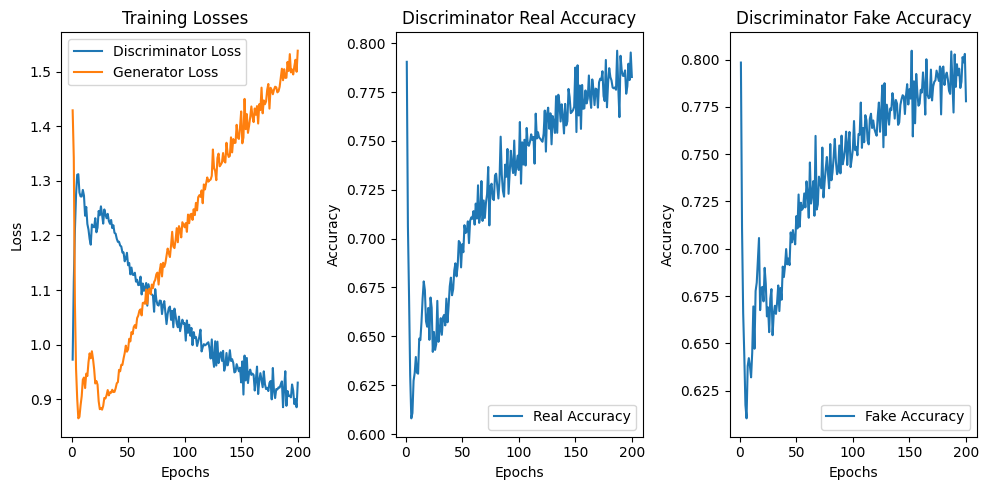

In [25]:
# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 201), epoch_D_losses, label='Discriminator Loss')
plt.plot(range(1, 201), epoch_G_losses, label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Discriminator Real Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, 201), epoch_D_real_accuracies, label='Real Accuracy')
plt.title('Discriminator Real Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Discriminator Fake Accuracy
plt.subplot(1, 3, 3)
plt.plot(range(1, 201), epoch_D_fake_accuracies, label='Fake Accuracy')
plt.title('Discriminator Fake Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

In [26]:
with torch.no_grad():
    test_z = Variable(torch.randn(100, z_dim).to(device))
    generated = G(test_z)

    save_image(generated.view(generated.size(0), 1, 28, 28), './sample_200' + '.png')

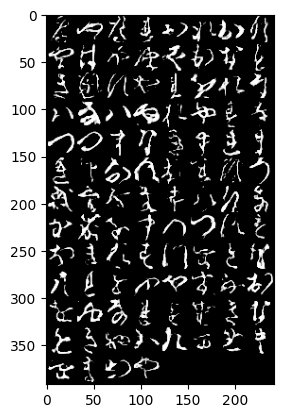

In [27]:
#Visualize kết quả từ mạng Generator sau quá trình training (sau 3200 epoch)
plt.imshow(plt.imread('./sample_200.png'))

#### Nhận xét:
Discriminator Loss và Generator Loss:
- Cả hai điều chưa tuột xuống thấp => vẫn còn học
- Qua mỗi epoch cả hai điều dao động lên xuống => hai bên điều đang đấu tranh và cùng tiến bộ
- Discriminator loss xu hướng giảm dần theo thời gian, Generator loss cũng xu hướng tăng dần theo thời gian => có thể suy đoán là chất lượng hình giả có cải thiện

Trong một số trường hợp, có thể thấy discriminator loss tăng, real accuracy và fake accuracy giảm, suy đoán rằng có sự cạnh tranh giữa generator và discriminator, hai mô hình vẫn đang tiếp tục học

Real Accuracy và Fake Accuracy:

- Real accuracy và fake accuracy đều dao động xung quanh giá trị 0.8, điều này có vẻ tốt vì có thể discriminator có khả năng phân biệt tốt cả giữa real và fake samples.

Chất lượng mẫu giả tăng trưởng so với 100 epoch trước

==> Mô hình khá ổn định, tiếp tục train


In [28]:
n_epoch = 200
for epoch in range(201, n_epoch+201):
    D_losses, G_losses, D_real_accuracies, D_fake_accuracies = [], [], [], []
    for batch_idx, (x, _) in enumerate(train_loader):
        # Discriminator training trước, Generator training sau
        D_loss, D_real_accuracy, D_fake_accuracy = discriminator_train(x)
        G_loss = generator_train(x)

        D_losses.append(D_loss)
        G_losses.append(G_loss)
        D_real_accuracies.append(D_real_accuracy)
        D_fake_accuracies.append(D_fake_accuracy)
    epoch_D_losses.append(torch.mean(torch.FloatTensor(D_losses)))
    epoch_G_losses.append(torch.mean(torch.FloatTensor(G_losses)))
    epoch_D_real_accuracies.append(torch.mean(torch.FloatTensor(D_real_accuracies)))
    epoch_D_fake_accuracies.append(torch.mean(torch.FloatTensor(D_fake_accuracies)))

    print('[%d/%d]: Discriminator loss: %.3f, Generator loss: %.3f, Real accuracy: %.3f, Fake accuracy: %.3f' % (
    epoch, 300+n_epoch, epoch_D_losses[-1], epoch_G_losses[-1], epoch_D_real_accuracies[-1], epoch_D_fake_accuracies[-1]))
    
    if (epoch) % 10 == 0:

        # Save the checkpoint
        checkpoint = {
            'epoch': epoch,
            'model_state_dict_G': G.state_dict(),
            'model_state_dict_D': D.state_dict(),
            'optimizer_state_dict_G': G_optimizer.state_dict(),
            'optimizer_state_dict_D': D_optimizer.state_dict(),
            'epoch_D_losses': epoch_D_losses,
            'epoch_G_losses': epoch_G_losses,
            'epoch_D_real_accuracies': epoch_D_real_accuracies,
            'epoch_D_fake_accuracies': epoch_D_fake_accuracies,
        }

        torch.save(checkpoint, 'checkpoint.pth')
        print("Checkpoint saved!")

[201/500]: Discriminator loss: 0.932, Generator loss: 1.542, Real accuracy: 0.768, Fake accuracy: 0.785


[202/500]: Discriminator loss: 0.867, Generator loss: 1.511, Real accuracy: 0.802, Fake accuracy: 0.811


[203/500]: Discriminator loss: 0.907, Generator loss: 1.526, Real accuracy: 0.782, Fake accuracy: 0.791


[204/500]: Discriminator loss: 0.909, Generator loss: 1.543, Real accuracy: 0.785, Fake accuracy: 0.793


[205/500]: Discriminator loss: 0.910, Generator loss: 1.550, Real accuracy: 0.787, Fake accuracy: 0.788


[206/500]: Discriminator loss: 0.871, Generator loss: 1.519, Real accuracy: 0.798, Fake accuracy: 0.806


[207/500]: Discriminator loss: 0.914, Generator loss: 1.550, Real accuracy: 0.780, Fake accuracy: 0.792


[208/500]: Discriminator loss: 0.930, Generator loss: 1.528, Real accuracy: 0.769, Fake accuracy: 0.783


[209/500]: Discriminator loss: 0.878, Generator loss: 1.523, Real accuracy: 0.797, Fake accuracy: 0.803


[210/500]: Discriminator loss: 0.903, Generator loss: 1.540, Real accuracy: 0.785, Fake accuracy: 0.794
Checkpoint saved!


[211/500]: Discriminator loss: 0.903, Generator loss: 1.541, Real accuracy: 0.787, Fake accuracy: 0.789


[212/500]: Discriminator loss: 0.875, Generator loss: 1.528, Real accuracy: 0.795, Fake accuracy: 0.806


[213/500]: Discriminator loss: 0.903, Generator loss: 1.573, Real accuracy: 0.783, Fake accuracy: 0.785


[214/500]: Discriminator loss: 0.867, Generator loss: 1.535, Real accuracy: 0.799, Fake accuracy: 0.810


[215/500]: Discriminator loss: 0.918, Generator loss: 1.546, Real accuracy: 0.776, Fake accuracy: 0.785


[216/500]: Discriminator loss: 0.883, Generator loss: 1.569, Real accuracy: 0.797, Fake accuracy: 0.793


[217/500]: Discriminator loss: 0.884, Generator loss: 1.541, Real accuracy: 0.790, Fake accuracy: 0.798


[218/500]: Discriminator loss: 0.900, Generator loss: 1.573, Real accuracy: 0.788, Fake accuracy: 0.791


[219/500]: Discriminator loss: 0.899, Generator loss: 1.532, Real accuracy: 0.783, Fake accuracy: 0.796


[220/500]: Discriminator loss: 0.879, Generator loss: 1.551, Real accuracy: 0.794, Fake accuracy: 0.799
Checkpoint saved!


[221/500]: Discriminator loss: 0.874, Generator loss: 1.546, Real accuracy: 0.792, Fake accuracy: 0.807


[222/500]: Discriminator loss: 0.905, Generator loss: 1.585, Real accuracy: 0.786, Fake accuracy: 0.787


[223/500]: Discriminator loss: 0.899, Generator loss: 1.570, Real accuracy: 0.788, Fake accuracy: 0.791


[224/500]: Discriminator loss: 0.897, Generator loss: 1.551, Real accuracy: 0.784, Fake accuracy: 0.799


[225/500]: Discriminator loss: 0.904, Generator loss: 1.576, Real accuracy: 0.786, Fake accuracy: 0.787


[226/500]: Discriminator loss: 0.910, Generator loss: 1.574, Real accuracy: 0.784, Fake accuracy: 0.786


[227/500]: Discriminator loss: 0.886, Generator loss: 1.591, Real accuracy: 0.791, Fake accuracy: 0.798


[228/500]: Discriminator loss: 0.876, Generator loss: 1.571, Real accuracy: 0.794, Fake accuracy: 0.803


[229/500]: Discriminator loss: 0.905, Generator loss: 1.577, Real accuracy: 0.784, Fake accuracy: 0.790


[230/500]: Discriminator loss: 0.898, Generator loss: 1.556, Real accuracy: 0.782, Fake accuracy: 0.797
Checkpoint saved!


[231/500]: Discriminator loss: 0.873, Generator loss: 1.578, Real accuracy: 0.800, Fake accuracy: 0.800


[232/500]: Discriminator loss: 0.867, Generator loss: 1.565, Real accuracy: 0.796, Fake accuracy: 0.809


[233/500]: Discriminator loss: 0.871, Generator loss: 1.650, Real accuracy: 0.792, Fake accuracy: 0.805


[234/500]: Discriminator loss: 0.903, Generator loss: 1.585, Real accuracy: 0.784, Fake accuracy: 0.791


[235/500]: Discriminator loss: 0.872, Generator loss: 1.588, Real accuracy: 0.796, Fake accuracy: 0.805


[236/500]: Discriminator loss: 0.925, Generator loss: 1.615, Real accuracy: 0.781, Fake accuracy: 0.777


[237/500]: Discriminator loss: 0.863, Generator loss: 1.568, Real accuracy: 0.800, Fake accuracy: 0.809


[238/500]: Discriminator loss: 0.890, Generator loss: 1.596, Real accuracy: 0.786, Fake accuracy: 0.795


[239/500]: Discriminator loss: 0.879, Generator loss: 1.590, Real accuracy: 0.790, Fake accuracy: 0.802


[240/500]: Discriminator loss: 0.883, Generator loss: 1.583, Real accuracy: 0.791, Fake accuracy: 0.799
Checkpoint saved!


[241/500]: Discriminator loss: 0.875, Generator loss: 1.612, Real accuracy: 0.790, Fake accuracy: 0.800


[242/500]: Discriminator loss: 0.869, Generator loss: 1.585, Real accuracy: 0.799, Fake accuracy: 0.803


[243/500]: Discriminator loss: 0.912, Generator loss: 1.611, Real accuracy: 0.780, Fake accuracy: 0.784


[244/500]: Discriminator loss: 0.851, Generator loss: 1.565, Real accuracy: 0.803, Fake accuracy: 0.813


[245/500]: Discriminator loss: 0.882, Generator loss: 1.626, Real accuracy: 0.795, Fake accuracy: 0.793


[246/500]: Discriminator loss: 0.890, Generator loss: 1.609, Real accuracy: 0.787, Fake accuracy: 0.793


[247/500]: Discriminator loss: 0.871, Generator loss: 1.606, Real accuracy: 0.789, Fake accuracy: 0.807


[248/500]: Discriminator loss: 0.875, Generator loss: 1.597, Real accuracy: 0.792, Fake accuracy: 0.802


[249/500]: Discriminator loss: 0.853, Generator loss: 1.608, Real accuracy: 0.805, Fake accuracy: 0.810


[250/500]: Discriminator loss: 0.892, Generator loss: 1.623, Real accuracy: 0.786, Fake accuracy: 0.792
Checkpoint saved!


[251/500]: Discriminator loss: 0.844, Generator loss: 1.621, Real accuracy: 0.805, Fake accuracy: 0.815


[252/500]: Discriminator loss: 0.897, Generator loss: 1.599, Real accuracy: 0.781, Fake accuracy: 0.793


[253/500]: Discriminator loss: 0.866, Generator loss: 1.628, Real accuracy: 0.801, Fake accuracy: 0.802


[254/500]: Discriminator loss: 0.878, Generator loss: 1.617, Real accuracy: 0.793, Fake accuracy: 0.799


[255/500]: Discriminator loss: 0.855, Generator loss: 1.583, Real accuracy: 0.799, Fake accuracy: 0.812


[256/500]: Discriminator loss: 0.886, Generator loss: 1.646, Real accuracy: 0.793, Fake accuracy: 0.791


[257/500]: Discriminator loss: 0.877, Generator loss: 1.600, Real accuracy: 0.790, Fake accuracy: 0.800


[258/500]: Discriminator loss: 0.897, Generator loss: 1.650, Real accuracy: 0.785, Fake accuracy: 0.791


[259/500]: Discriminator loss: 0.862, Generator loss: 1.597, Real accuracy: 0.792, Fake accuracy: 0.811


[260/500]: Discriminator loss: 0.844, Generator loss: 1.643, Real accuracy: 0.809, Fake accuracy: 0.812
Checkpoint saved!


[261/500]: Discriminator loss: 0.892, Generator loss: 1.668, Real accuracy: 0.787, Fake accuracy: 0.791


[262/500]: Discriminator loss: 0.867, Generator loss: 1.613, Real accuracy: 0.792, Fake accuracy: 0.811


[263/500]: Discriminator loss: 0.862, Generator loss: 1.659, Real accuracy: 0.804, Fake accuracy: 0.801


[264/500]: Discriminator loss: 0.862, Generator loss: 1.636, Real accuracy: 0.797, Fake accuracy: 0.808


[265/500]: Discriminator loss: 0.889, Generator loss: 1.636, Real accuracy: 0.786, Fake accuracy: 0.792


[266/500]: Discriminator loss: 0.855, Generator loss: 1.661, Real accuracy: 0.805, Fake accuracy: 0.805


[267/500]: Discriminator loss: 0.882, Generator loss: 1.644, Real accuracy: 0.790, Fake accuracy: 0.794


[268/500]: Discriminator loss: 0.867, Generator loss: 1.626, Real accuracy: 0.797, Fake accuracy: 0.804


[269/500]: Discriminator loss: 0.883, Generator loss: 1.706, Real accuracy: 0.786, Fake accuracy: 0.798


[270/500]: Discriminator loss: 0.864, Generator loss: 1.630, Real accuracy: 0.802, Fake accuracy: 0.800
Checkpoint saved!


[271/500]: Discriminator loss: 0.876, Generator loss: 1.639, Real accuracy: 0.792, Fake accuracy: 0.799


[272/500]: Discriminator loss: 0.871, Generator loss: 1.632, Real accuracy: 0.791, Fake accuracy: 0.805


[273/500]: Discriminator loss: 0.863, Generator loss: 1.647, Real accuracy: 0.800, Fake accuracy: 0.801


[274/500]: Discriminator loss: 0.889, Generator loss: 1.637, Real accuracy: 0.783, Fake accuracy: 0.797


[275/500]: Discriminator loss: 0.856, Generator loss: 1.656, Real accuracy: 0.807, Fake accuracy: 0.799


[276/500]: Discriminator loss: 0.876, Generator loss: 1.651, Real accuracy: 0.788, Fake accuracy: 0.804


[277/500]: Discriminator loss: 0.900, Generator loss: 1.679, Real accuracy: 0.785, Fake accuracy: 0.787


[278/500]: Discriminator loss: 0.866, Generator loss: 1.659, Real accuracy: 0.798, Fake accuracy: 0.800


[279/500]: Discriminator loss: 0.834, Generator loss: 1.610, Real accuracy: 0.806, Fake accuracy: 0.821


[280/500]: Discriminator loss: 0.887, Generator loss: 1.687, Real accuracy: 0.792, Fake accuracy: 0.792
Checkpoint saved!


[281/500]: Discriminator loss: 0.838, Generator loss: 1.608, Real accuracy: 0.804, Fake accuracy: 0.817


[282/500]: Discriminator loss: 0.868, Generator loss: 1.642, Real accuracy: 0.799, Fake accuracy: 0.802


[283/500]: Discriminator loss: 0.873, Generator loss: 1.662, Real accuracy: 0.792, Fake accuracy: 0.797


[284/500]: Discriminator loss: 0.876, Generator loss: 1.667, Real accuracy: 0.795, Fake accuracy: 0.799


[285/500]: Discriminator loss: 0.859, Generator loss: 1.645, Real accuracy: 0.798, Fake accuracy: 0.808


[286/500]: Discriminator loss: 0.848, Generator loss: 1.683, Real accuracy: 0.803, Fake accuracy: 0.807


[287/500]: Discriminator loss: 0.840, Generator loss: 1.651, Real accuracy: 0.807, Fake accuracy: 0.811


[288/500]: Discriminator loss: 0.863, Generator loss: 1.672, Real accuracy: 0.796, Fake accuracy: 0.803


[289/500]: Discriminator loss: 0.848, Generator loss: 1.659, Real accuracy: 0.809, Fake accuracy: 0.802


[290/500]: Discriminator loss: 0.883, Generator loss: 1.674, Real accuracy: 0.788, Fake accuracy: 0.799
Checkpoint saved!


[291/500]: Discriminator loss: 0.879, Generator loss: 1.662, Real accuracy: 0.787, Fake accuracy: 0.798


[292/500]: Discriminator loss: 0.882, Generator loss: 1.668, Real accuracy: 0.788, Fake accuracy: 0.793


[293/500]: Discriminator loss: 0.839, Generator loss: 1.642, Real accuracy: 0.805, Fake accuracy: 0.817


[294/500]: Discriminator loss: 0.849, Generator loss: 1.681, Real accuracy: 0.802, Fake accuracy: 0.807


[295/500]: Discriminator loss: 0.850, Generator loss: 1.695, Real accuracy: 0.799, Fake accuracy: 0.810


[296/500]: Discriminator loss: 0.867, Generator loss: 1.694, Real accuracy: 0.798, Fake accuracy: 0.799


[297/500]: Discriminator loss: 0.874, Generator loss: 1.685, Real accuracy: 0.794, Fake accuracy: 0.794


[298/500]: Discriminator loss: 0.808, Generator loss: 1.681, Real accuracy: 0.818, Fake accuracy: 0.824


[299/500]: Discriminator loss: 0.859, Generator loss: 1.702, Real accuracy: 0.792, Fake accuracy: 0.804


[300/500]: Discriminator loss: 0.861, Generator loss: 1.710, Real accuracy: 0.798, Fake accuracy: 0.805
Checkpoint saved!


[301/500]: Discriminator loss: 0.881, Generator loss: 1.709, Real accuracy: 0.792, Fake accuracy: 0.793


[302/500]: Discriminator loss: 0.820, Generator loss: 1.699, Real accuracy: 0.815, Fake accuracy: 0.818


[303/500]: Discriminator loss: 0.905, Generator loss: 1.679, Real accuracy: 0.779, Fake accuracy: 0.790


[304/500]: Discriminator loss: 0.847, Generator loss: 1.661, Real accuracy: 0.803, Fake accuracy: 0.808


[305/500]: Discriminator loss: 0.867, Generator loss: 1.721, Real accuracy: 0.796, Fake accuracy: 0.799


[306/500]: Discriminator loss: 0.821, Generator loss: 1.658, Real accuracy: 0.808, Fake accuracy: 0.825


[307/500]: Discriminator loss: 0.856, Generator loss: 1.724, Real accuracy: 0.801, Fake accuracy: 0.801


[308/500]: Discriminator loss: 0.863, Generator loss: 1.687, Real accuracy: 0.792, Fake accuracy: 0.808


[309/500]: Discriminator loss: 0.852, Generator loss: 1.701, Real accuracy: 0.807, Fake accuracy: 0.803


[310/500]: Discriminator loss: 0.849, Generator loss: 1.706, Real accuracy: 0.797, Fake accuracy: 0.807
Checkpoint saved!


[311/500]: Discriminator loss: 0.850, Generator loss: 1.694, Real accuracy: 0.804, Fake accuracy: 0.806


[312/500]: Discriminator loss: 0.861, Generator loss: 1.703, Real accuracy: 0.795, Fake accuracy: 0.802


[313/500]: Discriminator loss: 0.846, Generator loss: 1.681, Real accuracy: 0.797, Fake accuracy: 0.812


[314/500]: Discriminator loss: 0.862, Generator loss: 1.719, Real accuracy: 0.801, Fake accuracy: 0.799


[315/500]: Discriminator loss: 0.837, Generator loss: 1.705, Real accuracy: 0.806, Fake accuracy: 0.812


[316/500]: Discriminator loss: 0.852, Generator loss: 1.703, Real accuracy: 0.802, Fake accuracy: 0.806


[317/500]: Discriminator loss: 0.827, Generator loss: 1.706, Real accuracy: 0.813, Fake accuracy: 0.817


[318/500]: Discriminator loss: 0.848, Generator loss: 1.712, Real accuracy: 0.804, Fake accuracy: 0.804


[319/500]: Discriminator loss: 0.858, Generator loss: 1.679, Real accuracy: 0.792, Fake accuracy: 0.812


[320/500]: Discriminator loss: 0.838, Generator loss: 1.732, Real accuracy: 0.812, Fake accuracy: 0.804
Checkpoint saved!


[321/500]: Discriminator loss: 0.830, Generator loss: 1.684, Real accuracy: 0.808, Fake accuracy: 0.815


[322/500]: Discriminator loss: 0.894, Generator loss: 1.734, Real accuracy: 0.784, Fake accuracy: 0.790


[323/500]: Discriminator loss: 0.850, Generator loss: 1.733, Real accuracy: 0.804, Fake accuracy: 0.806


[324/500]: Discriminator loss: 0.849, Generator loss: 1.699, Real accuracy: 0.796, Fake accuracy: 0.810


[325/500]: Discriminator loss: 0.860, Generator loss: 1.730, Real accuracy: 0.798, Fake accuracy: 0.803


[326/500]: Discriminator loss: 0.823, Generator loss: 1.702, Real accuracy: 0.811, Fake accuracy: 0.813


[327/500]: Discriminator loss: 0.844, Generator loss: 1.716, Real accuracy: 0.803, Fake accuracy: 0.812


[328/500]: Discriminator loss: 0.858, Generator loss: 1.723, Real accuracy: 0.799, Fake accuracy: 0.803


[329/500]: Discriminator loss: 0.825, Generator loss: 1.698, Real accuracy: 0.807, Fake accuracy: 0.817


[330/500]: Discriminator loss: 0.825, Generator loss: 1.751, Real accuracy: 0.816, Fake accuracy: 0.813
Checkpoint saved!


[331/500]: Discriminator loss: 0.882, Generator loss: 1.715, Real accuracy: 0.787, Fake accuracy: 0.795


[332/500]: Discriminator loss: 0.827, Generator loss: 1.696, Real accuracy: 0.805, Fake accuracy: 0.823


[333/500]: Discriminator loss: 0.810, Generator loss: 1.704, Real accuracy: 0.819, Fake accuracy: 0.819


[334/500]: Discriminator loss: 0.886, Generator loss: 1.744, Real accuracy: 0.790, Fake accuracy: 0.788


[335/500]: Discriminator loss: 0.844, Generator loss: 1.720, Real accuracy: 0.797, Fake accuracy: 0.817


[336/500]: Discriminator loss: 0.849, Generator loss: 1.708, Real accuracy: 0.801, Fake accuracy: 0.808


[337/500]: Discriminator loss: 0.886, Generator loss: 1.772, Real accuracy: 0.794, Fake accuracy: 0.786


[338/500]: Discriminator loss: 0.850, Generator loss: 1.683, Real accuracy: 0.796, Fake accuracy: 0.814


[339/500]: Discriminator loss: 0.831, Generator loss: 1.742, Real accuracy: 0.812, Fake accuracy: 0.810


[340/500]: Discriminator loss: 0.830, Generator loss: 1.727, Real accuracy: 0.806, Fake accuracy: 0.817
Checkpoint saved!


[341/500]: Discriminator loss: 0.849, Generator loss: 1.709, Real accuracy: 0.800, Fake accuracy: 0.806


[342/500]: Discriminator loss: 0.852, Generator loss: 1.769, Real accuracy: 0.803, Fake accuracy: 0.805


[343/500]: Discriminator loss: 0.808, Generator loss: 1.708, Real accuracy: 0.818, Fake accuracy: 0.823


[344/500]: Discriminator loss: 0.833, Generator loss: 1.732, Real accuracy: 0.804, Fake accuracy: 0.813


[345/500]: Discriminator loss: 0.834, Generator loss: 1.763, Real accuracy: 0.812, Fake accuracy: 0.806


[346/500]: Discriminator loss: 0.853, Generator loss: 1.741, Real accuracy: 0.794, Fake accuracy: 0.807


[347/500]: Discriminator loss: 0.859, Generator loss: 1.796, Real accuracy: 0.796, Fake accuracy: 0.800


[348/500]: Discriminator loss: 0.813, Generator loss: 1.744, Real accuracy: 0.818, Fake accuracy: 0.817


[349/500]: Discriminator loss: 0.831, Generator loss: 1.743, Real accuracy: 0.814, Fake accuracy: 0.810


[350/500]: Discriminator loss: 0.857, Generator loss: 1.743, Real accuracy: 0.794, Fake accuracy: 0.808
Checkpoint saved!


[351/500]: Discriminator loss: 0.875, Generator loss: 1.746, Real accuracy: 0.788, Fake accuracy: 0.799


[352/500]: Discriminator loss: 0.802, Generator loss: 1.756, Real accuracy: 0.820, Fake accuracy: 0.823


[353/500]: Discriminator loss: 0.842, Generator loss: 1.760, Real accuracy: 0.804, Fake accuracy: 0.809


[354/500]: Discriminator loss: 0.859, Generator loss: 1.799, Real accuracy: 0.796, Fake accuracy: 0.799


[355/500]: Discriminator loss: 0.829, Generator loss: 1.752, Real accuracy: 0.810, Fake accuracy: 0.812


[356/500]: Discriminator loss: 0.851, Generator loss: 1.760, Real accuracy: 0.795, Fake accuracy: 0.804


[357/500]: Discriminator loss: 0.827, Generator loss: 1.716, Real accuracy: 0.807, Fake accuracy: 0.815


[358/500]: Discriminator loss: 0.857, Generator loss: 1.729, Real accuracy: 0.802, Fake accuracy: 0.799


[359/500]: Discriminator loss: 0.790, Generator loss: 1.736, Real accuracy: 0.820, Fake accuracy: 0.829


[360/500]: Discriminator loss: 0.847, Generator loss: 1.764, Real accuracy: 0.799, Fake accuracy: 0.806
Checkpoint saved!


[361/500]: Discriminator loss: 0.852, Generator loss: 1.769, Real accuracy: 0.802, Fake accuracy: 0.798


[362/500]: Discriminator loss: 0.821, Generator loss: 1.730, Real accuracy: 0.811, Fake accuracy: 0.818


[363/500]: Discriminator loss: 0.839, Generator loss: 1.713, Real accuracy: 0.804, Fake accuracy: 0.810


[364/500]: Discriminator loss: 0.839, Generator loss: 1.775, Real accuracy: 0.803, Fake accuracy: 0.812


[365/500]: Discriminator loss: 0.821, Generator loss: 1.802, Real accuracy: 0.812, Fake accuracy: 0.811


[366/500]: Discriminator loss: 0.794, Generator loss: 1.719, Real accuracy: 0.817, Fake accuracy: 0.828


[367/500]: Discriminator loss: 0.798, Generator loss: 1.804, Real accuracy: 0.826, Fake accuracy: 0.818


[368/500]: Discriminator loss: 0.851, Generator loss: 1.748, Real accuracy: 0.795, Fake accuracy: 0.810


[369/500]: Discriminator loss: 0.863, Generator loss: 1.802, Real accuracy: 0.795, Fake accuracy: 0.797


[370/500]: Discriminator loss: 0.839, Generator loss: 1.778, Real accuracy: 0.801, Fake accuracy: 0.816
Checkpoint saved!


[371/500]: Discriminator loss: 0.839, Generator loss: 1.775, Real accuracy: 0.810, Fake accuracy: 0.806


[372/500]: Discriminator loss: 0.848, Generator loss: 1.770, Real accuracy: 0.796, Fake accuracy: 0.810


[373/500]: Discriminator loss: 0.838, Generator loss: 1.744, Real accuracy: 0.810, Fake accuracy: 0.806


[374/500]: Discriminator loss: 0.846, Generator loss: 1.786, Real accuracy: 0.798, Fake accuracy: 0.808


[375/500]: Discriminator loss: 0.825, Generator loss: 1.811, Real accuracy: 0.810, Fake accuracy: 0.810


[376/500]: Discriminator loss: 0.850, Generator loss: 1.751, Real accuracy: 0.799, Fake accuracy: 0.805


[377/500]: Discriminator loss: 0.833, Generator loss: 1.723, Real accuracy: 0.803, Fake accuracy: 0.814


[378/500]: Discriminator loss: 0.788, Generator loss: 1.753, Real accuracy: 0.828, Fake accuracy: 0.825


[379/500]: Discriminator loss: 0.876, Generator loss: 1.784, Real accuracy: 0.789, Fake accuracy: 0.796


[380/500]: Discriminator loss: 0.841, Generator loss: 1.731, Real accuracy: 0.801, Fake accuracy: 0.811
Checkpoint saved!


[381/500]: Discriminator loss: 0.843, Generator loss: 1.801, Real accuracy: 0.809, Fake accuracy: 0.802


[382/500]: Discriminator loss: 0.808, Generator loss: 1.769, Real accuracy: 0.815, Fake accuracy: 0.820


[383/500]: Discriminator loss: 0.810, Generator loss: 1.733, Real accuracy: 0.809, Fake accuracy: 0.823


[384/500]: Discriminator loss: 0.834, Generator loss: 1.791, Real accuracy: 0.813, Fake accuracy: 0.803


[385/500]: Discriminator loss: 0.827, Generator loss: 1.732, Real accuracy: 0.805, Fake accuracy: 0.816


[386/500]: Discriminator loss: 0.814, Generator loss: 1.778, Real accuracy: 0.818, Fake accuracy: 0.815


[387/500]: Discriminator loss: 0.822, Generator loss: 1.754, Real accuracy: 0.801, Fake accuracy: 0.821


[388/500]: Discriminator loss: 0.819, Generator loss: 1.816, Real accuracy: 0.817, Fake accuracy: 0.808


[389/500]: Discriminator loss: 0.859, Generator loss: 1.775, Real accuracy: 0.795, Fake accuracy: 0.805


[390/500]: Discriminator loss: 0.835, Generator loss: 1.778, Real accuracy: 0.807, Fake accuracy: 0.809
Checkpoint saved!


[391/500]: Discriminator loss: 0.817, Generator loss: 1.804, Real accuracy: 0.812, Fake accuracy: 0.818


[392/500]: Discriminator loss: 0.824, Generator loss: 1.797, Real accuracy: 0.811, Fake accuracy: 0.807


[393/500]: Discriminator loss: 0.810, Generator loss: 1.795, Real accuracy: 0.815, Fake accuracy: 0.820


[394/500]: Discriminator loss: 0.806, Generator loss: 1.768, Real accuracy: 0.816, Fake accuracy: 0.825


[395/500]: Discriminator loss: 0.797, Generator loss: 1.781, Real accuracy: 0.818, Fake accuracy: 0.826


[396/500]: Discriminator loss: 0.836, Generator loss: 1.792, Real accuracy: 0.801, Fake accuracy: 0.816


[397/500]: Discriminator loss: 0.859, Generator loss: 1.777, Real accuracy: 0.797, Fake accuracy: 0.798


[398/500]: Discriminator loss: 0.824, Generator loss: 1.812, Real accuracy: 0.807, Fake accuracy: 0.812


[399/500]: Discriminator loss: 0.823, Generator loss: 1.787, Real accuracy: 0.810, Fake accuracy: 0.816


[400/500]: Discriminator loss: 0.878, Generator loss: 1.812, Real accuracy: 0.788, Fake accuracy: 0.793
Checkpoint saved!


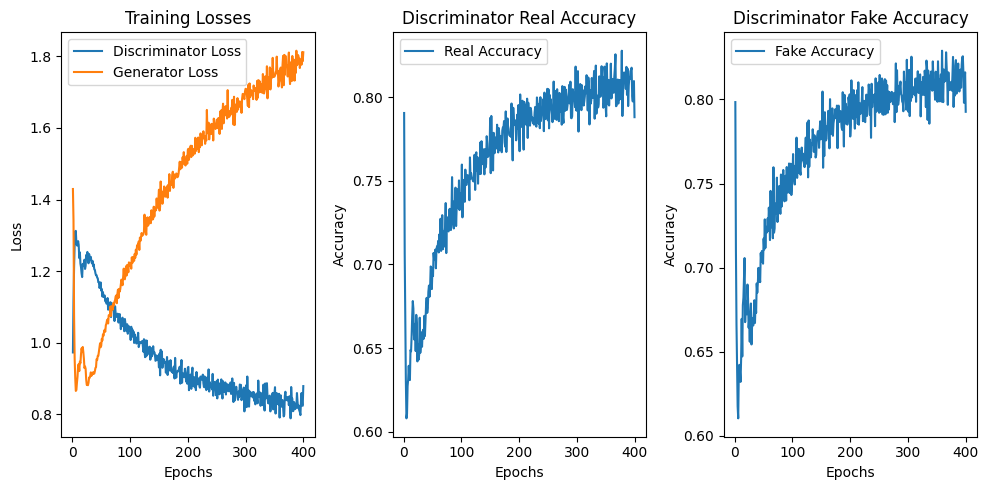

In [29]:
# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 401), epoch_D_losses, label='Discriminator Loss')
plt.plot(range(1, 401), epoch_G_losses, label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Discriminator Real Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, 401), epoch_D_real_accuracies, label='Real Accuracy')
plt.title('Discriminator Real Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Discriminator Fake Accuracy
plt.subplot(1, 3, 3)
plt.plot(range(1, 401), epoch_D_fake_accuracies, label='Fake Accuracy')
plt.title('Discriminator Fake Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

In [30]:
with torch.no_grad():
    test_3 = Variable(torch.randn(100, z_dim).to(device))
    generated = G(test_3)

    save_image(generated.view(generated.size(0), 1, 28, 28), './sample_400' + '.png')

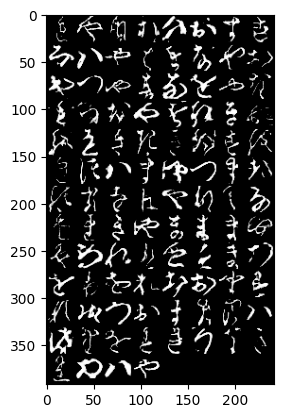

In [31]:
#Visualize kết quả từ mạng Generator sau quá trình training (sau 300 epoch)
plt.imshow(plt.imread('./sample_400.png'))

#### Nhận xét:
- Generator loss đang dao động lên xuống => generator vẫn đang thích nghi với phản hồi từ discriminator.

- Discriminator loss cũng đang dao động => Discriminator đang cố gắng phân biệt giữa các mẫu thật và giả, và mất mát của nó là một độ đo về việc nó làm được tốt đến đâu.

- Độ chính xác đối với cả mẫu thật và giả đang dao động lên xuống. Độ chính xác là ~0.8 cao cho cả mẫu thật và giả, Generator và Discriminator loss chênh lệch nhau ~1.5 => discriminator mạnh, hoặc dữ liệu huấn luyện không đủ đa dạng

- Generator và discriminator dường như đang được huấn luyện một cách ổn định, không có dấu hiệu của sự suy giảm mode hoặc các vấn đề lớn khác.

- Chất lượng mẫu giả trông có vẻ khá hơn ở một số số, có thể đoán được số bằng mắt thường

=> Thử áp dụng scheduler để thay đổi lr

In [32]:
from torch.optim.lr_scheduler import ReduceLROnPlateau

# Khởi tạo scheduler
scheduler_G = ReduceLROnPlateau(G_optimizer, mode='min', factor=0.2, patience=5, verbose=True)
scheduler_D = ReduceLROnPlateau(D_optimizer, mode='min', factor=0.2, patience=5, verbose=True)

In [33]:
n_epoch = 100

for epoch in range(401, n_epoch + 401):
    D_losses, G_losses, D_real_accuracies, D_fake_accuracies = [], [], [], []
    
    for batch_idx, (x, _) in enumerate(train_loader):
        # Discriminator training trước, Generator training sau
        D_loss, D_real_accuracy, D_fake_accuracy = discriminator_train(x)
        G_loss = generator_train(x)

        D_losses.append(D_loss)
        G_losses.append(G_loss)
        D_real_accuracies.append(D_real_accuracy)
        D_fake_accuracies.append(D_fake_accuracy)
    
    epoch_D_losses.append(torch.mean(torch.FloatTensor(D_losses)))
    epoch_G_losses.append(torch.mean(torch.FloatTensor(G_losses)))
    epoch_D_real_accuracies.append(torch.mean(torch.FloatTensor(D_real_accuracies)))
    epoch_D_fake_accuracies.append(torch.mean(torch.FloatTensor(D_fake_accuracies)))

    print('[%d/%d]: Discriminator loss: %.3f, Generator loss: %.3f, Real accuracy: %.3f, Fake accuracy: %.3f' % (
        epoch, 400 + n_epoch, epoch_D_losses[-1], epoch_G_losses[-1], epoch_D_real_accuracies[-1], epoch_D_fake_accuracies[-1]))

    # Cập nhật learning rate
    scheduler_G.step(epoch_D_losses[-1])
    scheduler_D.step(epoch_G_losses[-1])

[401/500]: Discriminator loss: 0.810, Generator loss: 1.801, Real accuracy: 0.817, Fake accuracy: 0.819


[402/500]: Discriminator loss: 0.810, Generator loss: 1.806, Real accuracy: 0.820, Fake accuracy: 0.816


[403/500]: Discriminator loss: 0.797, Generator loss: 1.756, Real accuracy: 0.820, Fake accuracy: 0.824


[404/500]: Discriminator loss: 0.830, Generator loss: 1.788, Real accuracy: 0.805, Fake accuracy: 0.816


[405/500]: Discriminator loss: 0.797, Generator loss: 1.798, Real accuracy: 0.822, Fake accuracy: 0.822


[406/500]: Discriminator loss: 0.821, Generator loss: 1.811, Real accuracy: 0.810, Fake accuracy: 0.815


[407/500]: Discriminator loss: 0.828, Generator loss: 1.830, Real accuracy: 0.811, Fake accuracy: 0.807


[408/500]: Discriminator loss: 0.814, Generator loss: 1.800, Real accuracy: 0.806, Fake accuracy: 0.821


[409/500]: Discriminator loss: 0.843, Generator loss: 1.821, Real accuracy: 0.806, Fake accuracy: 0.798
Epoch 00009: reducing learning rate of group 0 to 4.0000e-05.


[410/500]: Discriminator loss: 0.770, Generator loss: 1.728, Real accuracy: 0.829, Fake accuracy: 0.838


[411/500]: Discriminator loss: 0.747, Generator loss: 1.748, Real accuracy: 0.840, Fake accuracy: 0.845


[412/500]: Discriminator loss: 0.763, Generator loss: 1.714, Real accuracy: 0.833, Fake accuracy: 0.841


[413/500]: Discriminator loss: 0.746, Generator loss: 1.730, Real accuracy: 0.841, Fake accuracy: 0.846


[414/500]: Discriminator loss: 0.749, Generator loss: 1.745, Real accuracy: 0.839, Fake accuracy: 0.846


[415/500]: Discriminator loss: 0.750, Generator loss: 1.760, Real accuracy: 0.840, Fake accuracy: 0.844


[416/500]: Discriminator loss: 0.741, Generator loss: 1.735, Real accuracy: 0.843, Fake accuracy: 0.847


[417/500]: Discriminator loss: 0.753, Generator loss: 1.739, Real accuracy: 0.839, Fake accuracy: 0.842


[418/500]: Discriminator loss: 0.748, Generator loss: 1.747, Real accuracy: 0.839, Fake accuracy: 0.845
Epoch 00018: reducing learning rate of group 0 to 8.0000e-06.


[419/500]: Discriminator loss: 0.743, Generator loss: 1.739, Real accuracy: 0.845, Fake accuracy: 0.843


[420/500]: Discriminator loss: 0.749, Generator loss: 1.737, Real accuracy: 0.841, Fake accuracy: 0.847


[421/500]: Discriminator loss: 0.748, Generator loss: 1.744, Real accuracy: 0.841, Fake accuracy: 0.844


[422/500]: Discriminator loss: 0.761, Generator loss: 1.735, Real accuracy: 0.836, Fake accuracy: 0.840
Epoch 00022: reducing learning rate of group 0 to 4.0000e-05.


[423/500]: Discriminator loss: 0.781, Generator loss: 1.731, Real accuracy: 0.830, Fake accuracy: 0.833


[424/500]: Discriminator loss: 0.773, Generator loss: 1.710, Real accuracy: 0.832, Fake accuracy: 0.836


[425/500]: Discriminator loss: 0.789, Generator loss: 1.697, Real accuracy: 0.825, Fake accuracy: 0.834


[426/500]: Discriminator loss: 0.783, Generator loss: 1.676, Real accuracy: 0.830, Fake accuracy: 0.832


[427/500]: Discriminator loss: 0.791, Generator loss: 1.695, Real accuracy: 0.825, Fake accuracy: 0.832


[428/500]: Discriminator loss: 0.790, Generator loss: 1.693, Real accuracy: 0.825, Fake accuracy: 0.832
Epoch 00028: reducing learning rate of group 0 to 8.0000e-06.


[429/500]: Discriminator loss: 0.795, Generator loss: 1.694, Real accuracy: 0.824, Fake accuracy: 0.828


[430/500]: Discriminator loss: 0.789, Generator loss: 1.714, Real accuracy: 0.828, Fake accuracy: 0.832


[431/500]: Discriminator loss: 0.799, Generator loss: 1.680, Real accuracy: 0.822, Fake accuracy: 0.829


[432/500]: Discriminator loss: 0.798, Generator loss: 1.649, Real accuracy: 0.822, Fake accuracy: 0.831


[433/500]: Discriminator loss: 0.782, Generator loss: 1.671, Real accuracy: 0.828, Fake accuracy: 0.833


[434/500]: Discriminator loss: 0.791, Generator loss: 1.692, Real accuracy: 0.827, Fake accuracy: 0.829
Epoch 00034: reducing learning rate of group 0 to 1.6000e-06.


[435/500]: Discriminator loss: 0.793, Generator loss: 1.694, Real accuracy: 0.824, Fake accuracy: 0.830


[436/500]: Discriminator loss: 0.803, Generator loss: 1.672, Real accuracy: 0.821, Fake accuracy: 0.827


[437/500]: Discriminator loss: 0.802, Generator loss: 1.681, Real accuracy: 0.822, Fake accuracy: 0.828


[438/500]: Discriminator loss: 0.802, Generator loss: 1.698, Real accuracy: 0.821, Fake accuracy: 0.828
Epoch 00038: reducing learning rate of group 0 to 1.6000e-06.


[439/500]: Discriminator loss: 0.785, Generator loss: 1.678, Real accuracy: 0.829, Fake accuracy: 0.831


[440/500]: Discriminator loss: 0.791, Generator loss: 1.677, Real accuracy: 0.825, Fake accuracy: 0.830
Epoch 00040: reducing learning rate of group 0 to 3.2000e-07.


[441/500]: Discriminator loss: 0.785, Generator loss: 1.685, Real accuracy: 0.831, Fake accuracy: 0.832


[442/500]: Discriminator loss: 0.794, Generator loss: 1.710, Real accuracy: 0.824, Fake accuracy: 0.829


[443/500]: Discriminator loss: 0.787, Generator loss: 1.708, Real accuracy: 0.825, Fake accuracy: 0.832


[444/500]: Discriminator loss: 0.778, Generator loss: 1.677, Real accuracy: 0.828, Fake accuracy: 0.835
Epoch 00044: reducing learning rate of group 0 to 3.2000e-07.


[445/500]: Discriminator loss: 0.785, Generator loss: 1.704, Real accuracy: 0.829, Fake accuracy: 0.832


[446/500]: Discriminator loss: 0.788, Generator loss: 1.692, Real accuracy: 0.830, Fake accuracy: 0.828
Epoch 00046: reducing learning rate of group 0 to 6.4000e-08.


[447/500]: Discriminator loss: 0.799, Generator loss: 1.681, Real accuracy: 0.822, Fake accuracy: 0.829


[448/500]: Discriminator loss: 0.794, Generator loss: 1.672, Real accuracy: 0.829, Fake accuracy: 0.824


[449/500]: Discriminator loss: 0.773, Generator loss: 1.679, Real accuracy: 0.833, Fake accuracy: 0.838


[450/500]: Discriminator loss: 0.777, Generator loss: 1.692, Real accuracy: 0.827, Fake accuracy: 0.839
Epoch 00050: reducing learning rate of group 0 to 6.4000e-08.


[451/500]: Discriminator loss: 0.800, Generator loss: 1.706, Real accuracy: 0.820, Fake accuracy: 0.829


[452/500]: Discriminator loss: 0.784, Generator loss: 1.695, Real accuracy: 0.832, Fake accuracy: 0.831
Epoch 00052: reducing learning rate of group 0 to 1.2800e-08.


[453/500]: Discriminator loss: 0.789, Generator loss: 1.682, Real accuracy: 0.827, Fake accuracy: 0.830


[454/500]: Discriminator loss: 0.790, Generator loss: 1.693, Real accuracy: 0.833, Fake accuracy: 0.826


[455/500]: Discriminator loss: 0.809, Generator loss: 1.700, Real accuracy: 0.821, Fake accuracy: 0.824


[456/500]: Discriminator loss: 0.779, Generator loss: 1.688, Real accuracy: 0.830, Fake accuracy: 0.834
Epoch 00056: reducing learning rate of group 0 to 1.2800e-08.


[457/500]: Discriminator loss: 0.792, Generator loss: 1.715, Real accuracy: 0.823, Fake accuracy: 0.834


[458/500]: Discriminator loss: 0.785, Generator loss: 1.687, Real accuracy: 0.831, Fake accuracy: 0.828
Epoch 00058: reducing learning rate of group 0 to 2.5600e-09.


[459/500]: Discriminator loss: 0.797, Generator loss: 1.670, Real accuracy: 0.825, Fake accuracy: 0.829


[460/500]: Discriminator loss: 0.780, Generator loss: 1.683, Real accuracy: 0.828, Fake accuracy: 0.837


[461/500]: Discriminator loss: 0.789, Generator loss: 1.683, Real accuracy: 0.823, Fake accuracy: 0.834


[462/500]: Discriminator loss: 0.796, Generator loss: 1.718, Real accuracy: 0.826, Fake accuracy: 0.825
Epoch 00062: reducing learning rate of group 0 to 2.5600e-09.


[463/500]: Discriminator loss: 0.790, Generator loss: 1.711, Real accuracy: 0.820, Fake accuracy: 0.835


[464/500]: Discriminator loss: 0.782, Generator loss: 1.694, Real accuracy: 0.831, Fake accuracy: 0.834


[465/500]: Discriminator loss: 0.799, Generator loss: 1.681, Real accuracy: 0.819, Fake accuracy: 0.831


[466/500]: Discriminator loss: 0.795, Generator loss: 1.710, Real accuracy: 0.822, Fake accuracy: 0.830


[467/500]: Discriminator loss: 0.793, Generator loss: 1.688, Real accuracy: 0.822, Fake accuracy: 0.833


[468/500]: Discriminator loss: 0.783, Generator loss: 1.701, Real accuracy: 0.828, Fake accuracy: 0.835


[469/500]: Discriminator loss: 0.788, Generator loss: 1.668, Real accuracy: 0.820, Fake accuracy: 0.838


[470/500]: Discriminator loss: 0.814, Generator loss: 1.688, Real accuracy: 0.816, Fake accuracy: 0.823


[471/500]: Discriminator loss: 0.799, Generator loss: 1.706, Real accuracy: 0.822, Fake accuracy: 0.829


[472/500]: Discriminator loss: 0.784, Generator loss: 1.692, Real accuracy: 0.826, Fake accuracy: 0.837


[473/500]: Discriminator loss: 0.804, Generator loss: 1.684, Real accuracy: 0.817, Fake accuracy: 0.832


[474/500]: Discriminator loss: 0.794, Generator loss: 1.683, Real accuracy: 0.819, Fake accuracy: 0.832


[475/500]: Discriminator loss: 0.798, Generator loss: 1.692, Real accuracy: 0.819, Fake accuracy: 0.833


[476/500]: Discriminator loss: 0.797, Generator loss: 1.691, Real accuracy: 0.829, Fake accuracy: 0.824


[477/500]: Discriminator loss: 0.794, Generator loss: 1.670, Real accuracy: 0.820, Fake accuracy: 0.834


[478/500]: Discriminator loss: 0.791, Generator loss: 1.679, Real accuracy: 0.824, Fake accuracy: 0.832


[479/500]: Discriminator loss: 0.797, Generator loss: 1.677, Real accuracy: 0.823, Fake accuracy: 0.829


[480/500]: Discriminator loss: 0.783, Generator loss: 1.707, Real accuracy: 0.831, Fake accuracy: 0.830


[481/500]: Discriminator loss: 0.800, Generator loss: 1.682, Real accuracy: 0.823, Fake accuracy: 0.828


[482/500]: Discriminator loss: 0.804, Generator loss: 1.685, Real accuracy: 0.815, Fake accuracy: 0.833


[483/500]: Discriminator loss: 0.787, Generator loss: 1.704, Real accuracy: 0.818, Fake accuracy: 0.841


[484/500]: Discriminator loss: 0.791, Generator loss: 1.681, Real accuracy: 0.825, Fake accuracy: 0.830


[485/500]: Discriminator loss: 0.790, Generator loss: 1.727, Real accuracy: 0.825, Fake accuracy: 0.831


[486/500]: Discriminator loss: 0.798, Generator loss: 1.678, Real accuracy: 0.825, Fake accuracy: 0.826


[487/500]: Discriminator loss: 0.798, Generator loss: 1.693, Real accuracy: 0.826, Fake accuracy: 0.825


[488/500]: Discriminator loss: 0.809, Generator loss: 1.699, Real accuracy: 0.820, Fake accuracy: 0.824


[489/500]: Discriminator loss: 0.796, Generator loss: 1.707, Real accuracy: 0.826, Fake accuracy: 0.829


[490/500]: Discriminator loss: 0.801, Generator loss: 1.679, Real accuracy: 0.826, Fake accuracy: 0.826


[491/500]: Discriminator loss: 0.784, Generator loss: 1.716, Real accuracy: 0.827, Fake accuracy: 0.834


[492/500]: Discriminator loss: 0.795, Generator loss: 1.708, Real accuracy: 0.824, Fake accuracy: 0.829


[493/500]: Discriminator loss: 0.799, Generator loss: 1.709, Real accuracy: 0.823, Fake accuracy: 0.828


[494/500]: Discriminator loss: 0.779, Generator loss: 1.688, Real accuracy: 0.830, Fake accuracy: 0.835


[495/500]: Discriminator loss: 0.780, Generator loss: 1.677, Real accuracy: 0.832, Fake accuracy: 0.833


[496/500]: Discriminator loss: 0.790, Generator loss: 1.675, Real accuracy: 0.822, Fake accuracy: 0.838


[497/500]: Discriminator loss: 0.798, Generator loss: 1.700, Real accuracy: 0.826, Fake accuracy: 0.826


[498/500]: Discriminator loss: 0.787, Generator loss: 1.654, Real accuracy: 0.823, Fake accuracy: 0.838


[499/500]: Discriminator loss: 0.794, Generator loss: 1.683, Real accuracy: 0.828, Fake accuracy: 0.826


[500/500]: Discriminator loss: 0.790, Generator loss: 1.686, Real accuracy: 0.819, Fake accuracy: 0.837


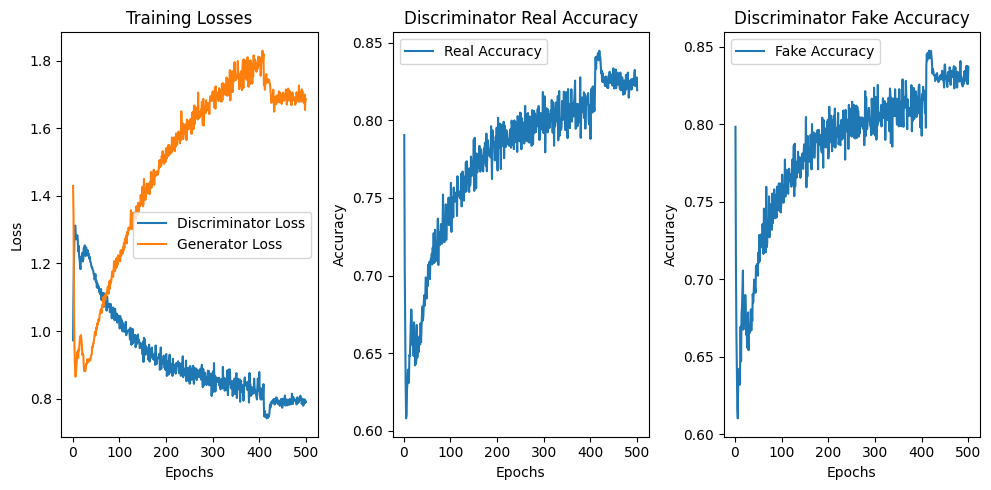

In [34]:
# Plot Training Loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(range(1, 501), epoch_D_losses, label='Discriminator Loss')
plt.plot(range(1, 501), epoch_G_losses, label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Discriminator Real Accuracy
plt.subplot(1, 3, 2)
plt.plot(range(1, 501), epoch_D_real_accuracies, label='Real Accuracy')
plt.title('Discriminator Real Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Discriminator Fake Accuracy
plt.subplot(1, 3, 3)
plt.plot(range(1, 501), epoch_D_fake_accuracies, label='Fake Accuracy')
plt.title('Discriminator Fake Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

In [35]:
with torch.no_grad():
    test_4 = Variable(torch.randn(100, z_dim).to(device))
    generated = G(test_4)

    save_image(generated.view(generated.size(0), 1, 28, 28), './sample_500' + '.png')

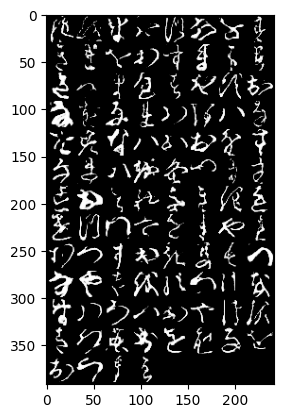

In [36]:
#Visualize kết quả từ mạng Generator sau quá trình training (sau 500 epoch)
plt.imshow(plt.imread('./sample_500.png'))

#### Nhận xét:
Mô hình tự giảm learning rate theo thời gian, có thể giúp tối ưu hóa quá trình đào tạo, nhất là khi tiến triển của mô hình chậm lại: epoch 409, 417, 421, 427, 430, 433, 439, 442, 445, 451, và 457.

Discriminator loss giảm dần và dao động ổn định=> vẫn đang học. Sau khi áp dụng skeduler Generator loss có vẻ ổn định.

Real accuracy và Fake accuracy dao động xung quanh giá trị cao => Generator và Discriminator còn đang cạnh tranh.
Chất lượng của Generator khá hơn nhiều, nét chử mảnh hơn, mắt thường cảm thấy rất nhiều chữ khá thật

Mô hình đã đi vào giai đoạn ổn định

=> Tiếp tục train

In [37]:
n_epoch = 500

for epoch in range(501, n_epoch + 501):
    D_losses, G_losses, D_real_accuracies, D_fake_accuracies = [], [], [], []
    
    for batch_idx, (x, _) in enumerate(train_loader):
        # Discriminator training trước, Generator training sau
        D_loss, D_real_accuracy, D_fake_accuracy = discriminator_train(x)
        G_loss = generator_train(x)

        D_losses.append(D_loss)
        G_losses.append(G_loss)
        D_real_accuracies.append(D_real_accuracy)
        D_fake_accuracies.append(D_fake_accuracy)
    
    epoch_D_losses.append(torch.mean(torch.FloatTensor(D_losses)))
    epoch_G_losses.append(torch.mean(torch.FloatTensor(G_losses)))
    epoch_D_real_accuracies.append(torch.mean(torch.FloatTensor(D_real_accuracies)))
    epoch_D_fake_accuracies.append(torch.mean(torch.FloatTensor(D_fake_accuracies)))

    if (epoch) % 10 == 0:
        print('[%d/%d]: Discriminator loss: %.3f, Generator loss: %.3f, Real accuracy: %.3f, Fake accuracy: %.3f' % (
            epoch, 500 + n_epoch, epoch_D_losses[-1], epoch_G_losses[-1], epoch_D_real_accuracies[-1], epoch_D_fake_accuracies[-1]))

    # Cập nhật learning rate
    scheduler_G.step(epoch_D_losses[-1])
    scheduler_D.step(epoch_G_losses[-1])
    
    if (epoch) % 10 == 0:
        # Save the checkpoint
        checkpoint = {
            'epoch': epoch,
            'model_state_dict_G': G.state_dict(),
            'model_state_dict_D': D.state_dict(),
            'optimizer_state_dict_G': G_optimizer.state_dict(),
            'optimizer_state_dict_D': D_optimizer.state_dict(),
            'epoch_D_losses': epoch_D_losses,
            'epoch_G_losses': epoch_G_losses,
            'epoch_D_real_accuracies': epoch_D_real_accuracies,
            'epoch_D_fake_accuracies': epoch_D_fake_accuracies,
        }

        torch.save(checkpoint, 'checkpoint.pth')
        print("Checkpoint saved!")

[510/1000]: Discriminator loss: 0.791, Generator loss: 1.670, Real accuracy: 0.820, Fake accuracy: 0.834
Checkpoint saved!


[520/1000]: Discriminator loss: 0.804, Generator loss: 1.685, Real accuracy: 0.823, Fake accuracy: 0.823
Checkpoint saved!


[530/1000]: Discriminator loss: 0.788, Generator loss: 1.673, Real accuracy: 0.825, Fake accuracy: 0.835
Checkpoint saved!


[540/1000]: Discriminator loss: 0.783, Generator loss: 1.643, Real accuracy: 0.826, Fake accuracy: 0.834
Checkpoint saved!


[550/1000]: Discriminator loss: 0.789, Generator loss: 1.703, Real accuracy: 0.822, Fake accuracy: 0.836
Checkpoint saved!


[560/1000]: Discriminator loss: 0.782, Generator loss: 1.704, Real accuracy: 0.829, Fake accuracy: 0.832
Checkpoint saved!


[570/1000]: Discriminator loss: 0.784, Generator loss: 1.685, Real accuracy: 0.822, Fake accuracy: 0.840
Checkpoint saved!


[580/1000]: Discriminator loss: 0.789, Generator loss: 1.705, Real accuracy: 0.830, Fake accuracy: 0.827
Checkpoint saved!


[590/1000]: Discriminator loss: 0.781, Generator loss: 1.692, Real accuracy: 0.834, Fake accuracy: 0.833


Checkpoint saved!


[600/1000]: Discriminator loss: 0.784, Generator loss: 1.706, Real accuracy: 0.832, Fake accuracy: 0.831
Checkpoint saved!


[610/1000]: Discriminator loss: 0.791, Generator loss: 1.698, Real accuracy: 0.825, Fake accuracy: 0.834
Checkpoint saved!


[620/1000]: Discriminator loss: 0.801, Generator loss: 1.705, Real accuracy: 0.823, Fake accuracy: 0.827
Checkpoint saved!


[630/1000]: Discriminator loss: 0.802, Generator loss: 1.664, Real accuracy: 0.821, Fake accuracy: 0.829
Checkpoint saved!


[640/1000]: Discriminator loss: 0.790, Generator loss: 1.713, Real accuracy: 0.823, Fake accuracy: 0.834
Checkpoint saved!


[650/1000]: Discriminator loss: 0.792, Generator loss: 1.704, Real accuracy: 0.827, Fake accuracy: 0.828
Checkpoint saved!


[660/1000]: Discriminator loss: 0.792, Generator loss: 1.709, Real accuracy: 0.824, Fake accuracy: 0.831
Checkpoint saved!


[670/1000]: Discriminator loss: 0.784, Generator loss: 1.704, Real accuracy: 0.831, Fake accuracy: 0.828
Checkpoint saved!


[680/1000]: Discriminator loss: 0.787, Generator loss: 1.694, Real accuracy: 0.826, Fake accuracy: 0.833
Checkpoint saved!


[690/1000]: Discriminator loss: 0.782, Generator loss: 1.678, Real accuracy: 0.827, Fake accuracy: 0.833
Checkpoint saved!


[700/1000]: Discriminator loss: 0.789, Generator loss: 1.697, Real accuracy: 0.823, Fake accuracy: 0.835
Checkpoint saved!


[710/1000]: Discriminator loss: 0.788, Generator loss: 1.669, Real accuracy: 0.826, Fake accuracy: 0.831


Checkpoint saved!


[720/1000]: Discriminator loss: 0.790, Generator loss: 1.682, Real accuracy: 0.820, Fake accuracy: 0.837
Checkpoint saved!


[730/1000]: Discriminator loss: 0.792, Generator loss: 1.688, Real accuracy: 0.829, Fake accuracy: 0.827
Checkpoint saved!


[740/1000]: Discriminator loss: 0.785, Generator loss: 1.671, Real accuracy: 0.822, Fake accuracy: 0.838
Checkpoint saved!


[750/1000]: Discriminator loss: 0.798, Generator loss: 1.702, Real accuracy: 0.824, Fake accuracy: 0.830
Checkpoint saved!


[760/1000]: Discriminator loss: 0.792, Generator loss: 1.679, Real accuracy: 0.829, Fake accuracy: 0.828
Checkpoint saved!


[770/1000]: Discriminator loss: 0.795, Generator loss: 1.665, Real accuracy: 0.829, Fake accuracy: 0.826
Checkpoint saved!


[780/1000]: Discriminator loss: 0.793, Generator loss: 1.708, Real accuracy: 0.823, Fake accuracy: 0.831
Checkpoint saved!


[790/1000]: Discriminator loss: 0.794, Generator loss: 1.706, Real accuracy: 0.826, Fake accuracy: 0.829


Checkpoint saved!


[800/1000]: Discriminator loss: 0.777, Generator loss: 1.688, Real accuracy: 0.831, Fake accuracy: 0.836


Checkpoint saved!


[810/1000]: Discriminator loss: 0.778, Generator loss: 1.688, Real accuracy: 0.830, Fake accuracy: 0.834
Checkpoint saved!


[820/1000]: Discriminator loss: 0.803, Generator loss: 1.697, Real accuracy: 0.816, Fake accuracy: 0.832
Checkpoint saved!


[830/1000]: Discriminator loss: 0.789, Generator loss: 1.674, Real accuracy: 0.825, Fake accuracy: 0.832
Checkpoint saved!


[840/1000]: Discriminator loss: 0.780, Generator loss: 1.665, Real accuracy: 0.829, Fake accuracy: 0.833
Checkpoint saved!


[850/1000]: Discriminator loss: 0.782, Generator loss: 1.681, Real accuracy: 0.826, Fake accuracy: 0.835


Checkpoint saved!


[860/1000]: Discriminator loss: 0.789, Generator loss: 1.682, Real accuracy: 0.832, Fake accuracy: 0.826
Checkpoint saved!


[870/1000]: Discriminator loss: 0.809, Generator loss: 1.693, Real accuracy: 0.820, Fake accuracy: 0.821


Checkpoint saved!


[880/1000]: Discriminator loss: 0.808, Generator loss: 1.677, Real accuracy: 0.819, Fake accuracy: 0.825


Checkpoint saved!


[890/1000]: Discriminator loss: 0.798, Generator loss: 1.685, Real accuracy: 0.822, Fake accuracy: 0.829


Checkpoint saved!


[900/1000]: Discriminator loss: 0.794, Generator loss: 1.685, Real accuracy: 0.824, Fake accuracy: 0.831
Checkpoint saved!


[910/1000]: Discriminator loss: 0.792, Generator loss: 1.708, Real accuracy: 0.825, Fake accuracy: 0.831


Checkpoint saved!


[920/1000]: Discriminator loss: 0.794, Generator loss: 1.674, Real accuracy: 0.831, Fake accuracy: 0.826


Checkpoint saved!


[930/1000]: Discriminator loss: 0.798, Generator loss: 1.688, Real accuracy: 0.821, Fake accuracy: 0.828


Checkpoint saved!


[940/1000]: Discriminator loss: 0.802, Generator loss: 1.692, Real accuracy: 0.822, Fake accuracy: 0.826


Checkpoint saved!


[950/1000]: Discriminator loss: 0.777, Generator loss: 1.670, Real accuracy: 0.834, Fake accuracy: 0.835


Checkpoint saved!


[960/1000]: Discriminator loss: 0.790, Generator loss: 1.685, Real accuracy: 0.826, Fake accuracy: 0.830


Checkpoint saved!


[970/1000]: Discriminator loss: 0.794, Generator loss: 1.647, Real accuracy: 0.823, Fake accuracy: 0.832


Checkpoint saved!


[980/1000]: Discriminator loss: 0.792, Generator loss: 1.670, Real accuracy: 0.831, Fake accuracy: 0.828


Checkpoint saved!


[990/1000]: Discriminator loss: 0.790, Generator loss: 1.691, Real accuracy: 0.827, Fake accuracy: 0.830


Checkpoint saved!


[1000/1000]: Discriminator loss: 0.787, Generator loss: 1.676, Real accuracy: 0.827, Fake accuracy: 0.832


Checkpoint saved!


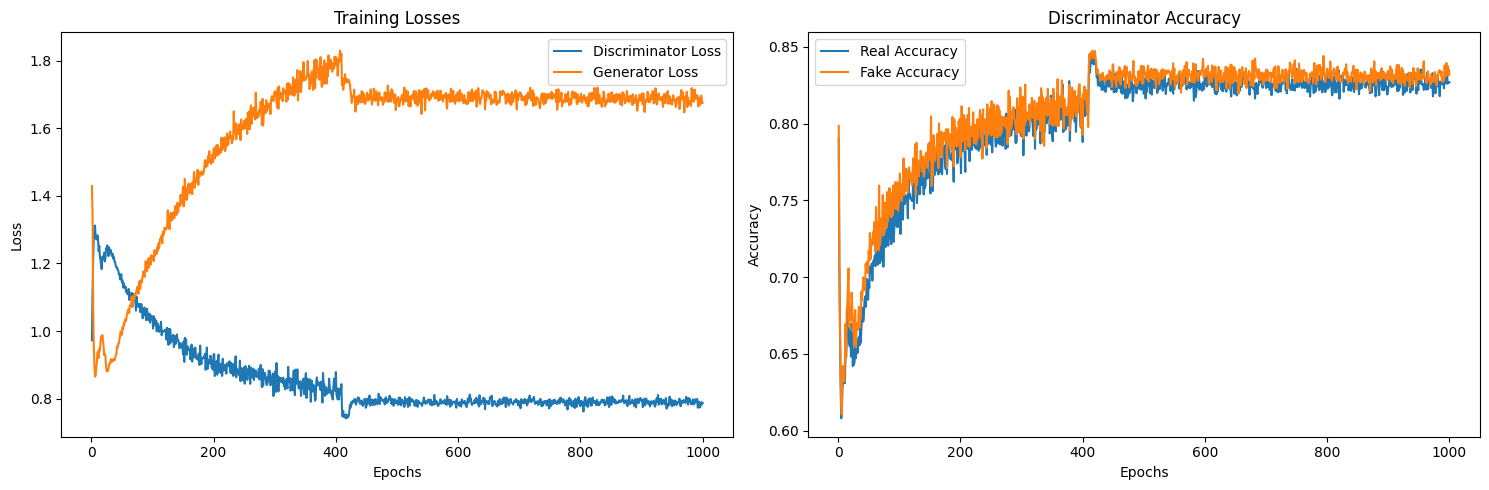

In [38]:
# Plot Training Loss and Discriminator Accuracy
plt.figure(figsize=(15, 5))

# Plot Training Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, 1001), epoch_D_losses, label='Discriminator Loss')
plt.plot(range(1, 1001), epoch_G_losses, label='Generator Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Discriminator Accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, 1001), epoch_D_real_accuracies, label='Real Accuracy')
plt.plot(range(1, 1001), epoch_D_fake_accuracies, label='Fake Accuracy')
plt.title('Discriminator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plots
plt.show()

In [39]:
with torch.no_grad():
    test_5 = Variable(torch.randn(100, z_dim).to(device))
    generated = G(test_5)

    save_image(generated.view(generated.size(0), 1, 28, 28), './sample_1000' + '.png')

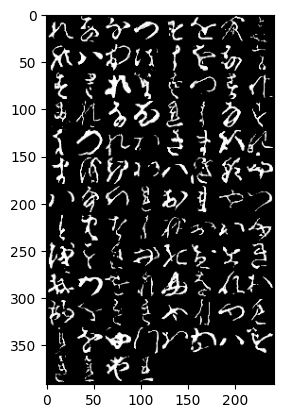

In [40]:
#Visualize kết quả từ mạng Generator sau quá trình training (sau 700 epoch)
plt.imshow(plt.imread('./sample_1000.png'))

### Nhận xét:

Mô hình chạy ổn định, loss vẫn chưa hội tụ => cần cải tiến

Hình giả của 1 số ký tự nhìn rất tự nhiên, phần lớn các ký tự chất lượng có tiến bộ, nhưng chưa đạt được chất lượng tốt nhất. 

=> Cần cải thiện và train rất nhiều lần nữa để đạt được chất lượng tốt nhất.

# Nhận xét mô hình:
- Mô hình xây dựng ngốn GPU cao, hao tài nguyên
- Mô hình từng bước học có tiến bộ
- Mô hình tương đối ổn định, không bị các lỗi lớn
- Mô hình còn chưa đủ thông minh để đạt được hiệu quả tốt, cần thêm huấn luyện và điều chỉnh thêm nữa

In [41]:
accuracy = ((D(G(torch.randn(batch_size, z_dim).to(device))) >= 0.5).float() == torch.zeros(batch_size, 1).to(device)).sum().item() / batch_size
accuracy

0.855

In [42]:
# Save the model checkpoints
torch.save(G.state_dict(), 'G.ckpt')
torch.save(D.state_dict(), 'D.ckpt')

In [ ]:
#Load checkpoint nếu bỏ qua bước trainning
G = Generator(z_dim, 1)
G.load_state_dict(torch.load('G.ckpt'))
G.to(device)
G.eval()

D = Discriminator(1)
D.load_state_dict(torch.load('D.ckpt'))
D.to(device)
D.eval()